# Taller 3 (Algoritmos de clasificación)
Presentado por:
Andrés Mauricio Martínez Celis, Cod:  202322624<br>
Danilo Andrés Alfonso Bohórquez, Cod: 201611827<br>
Jairo Vladimir Chaparro Rodríguez, Cod: 201531080<br>
Oscar Duvan Giraldo Romero, Cod: 202324939<br>
Contexto: Empresa que quiere saber sobre los propensos al abandono de los servicios de la compañia (churn)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

In [2]:
dataChurn = pd.read_json('Archivos/churn_historic.json')

In [3]:
dataChurn.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5021,1580-BMCMR,Male,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,87.30,1637.3,No
4311,2599-CIPQE,Male,0,Yes,Yes,71,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),109.30,7782.85,No
4604,2082-CEFLT,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.60,45.6,Yes
205,1248-DYXUB,Male,0,Yes,Yes,52,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.80,1229.1,No
1582,3190-FZATL,Male,0,No,Yes,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,268.4,No


In [4]:
dataChurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
dataChurn.shape

(6000, 21)

In [6]:
dataChurn['TotalCharges'] = pd.to_numeric(dataChurn['TotalCharges'], errors='coerce')

In [7]:
nan_rows = dataChurn[dataChurn['TotalCharges'].isna()]

In [8]:
nan_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
553,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
736,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1040,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3215,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3669,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
4507,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5859,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
5943,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


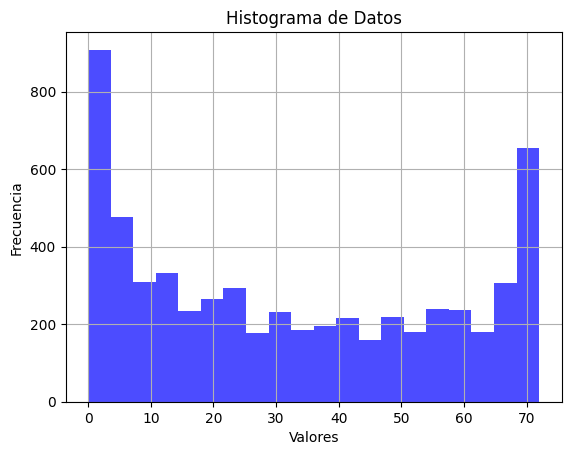

In [9]:
# Crear histograma
plt.hist(dataChurn['tenure'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de Datos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

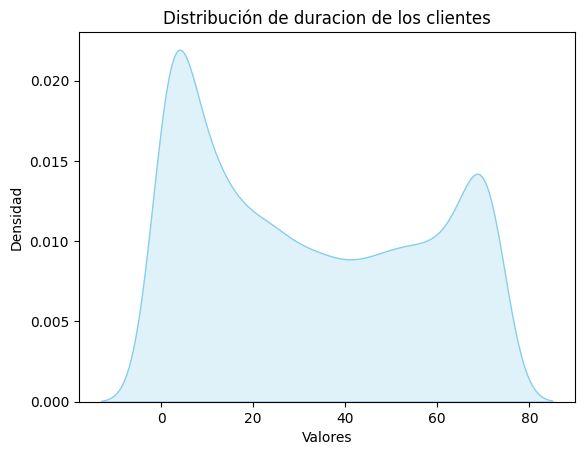

In [10]:
sns.kdeplot(dataChurn['tenure'], fill=True, color="skyblue")
plt.title('Distribución de duracion de los clientes')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

In [11]:
dataChurn['tenure'].describe()

count    6000.000000
mean       32.320667
std        24.637296
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

La distribución muestra grandes picos en los mínimos y máximos, lo que demuestra que los clientes suelen o durar demasiado o tener una tasa alta de poderse ir al inicio de su estancia en la compañía

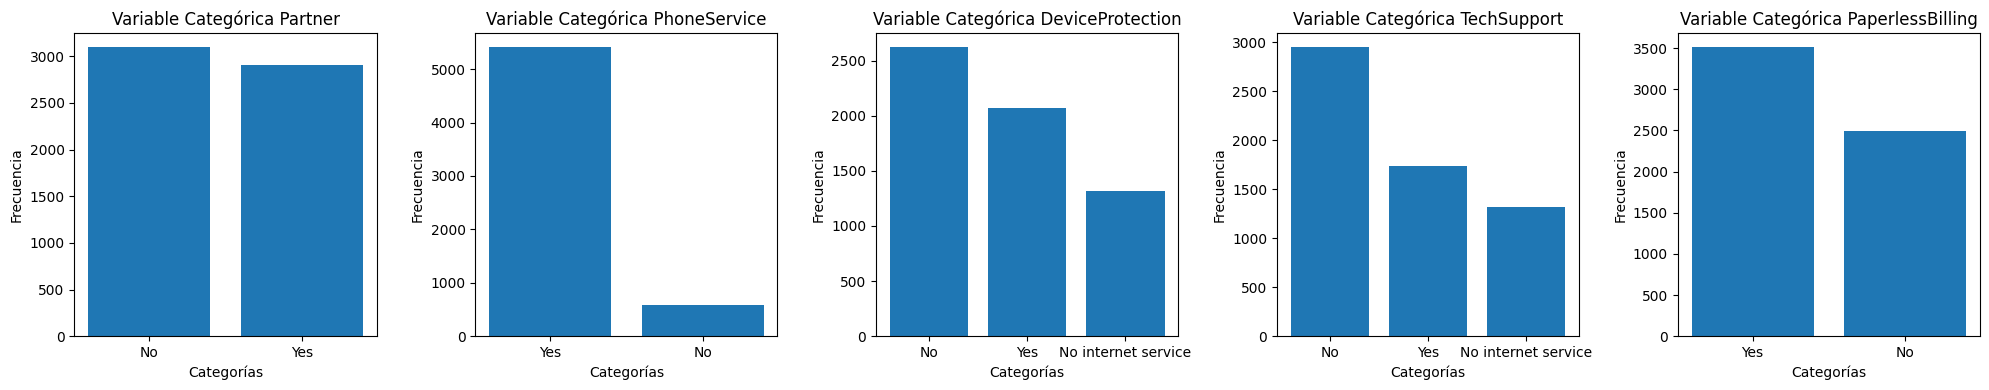

In [12]:
varYesNot = ['Partner', 'PhoneService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']

fig, axs = plt.subplots(1, len(varYesNot), figsize=(20, 4))

for i, item in enumerate(varYesNot):
    frecuencia_categorias = dataChurn[item].value_counts()

    axs[i].bar(frecuencia_categorias.index, frecuencia_categorias)
    axs[i].set_title('Variable Categórica ' + item)
    axs[i].set_xlabel('Categorías')
    axs[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

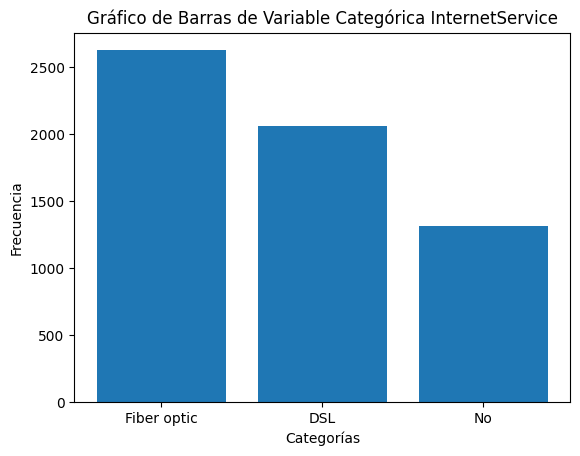

In [13]:
frecuencia_categorias = dataChurn['InternetService'].value_counts()

plt.bar(frecuencia_categorias.index, frecuencia_categorias)

plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de Variable Categórica '+'InternetService')

# Mostrar el gráfico
plt.show()

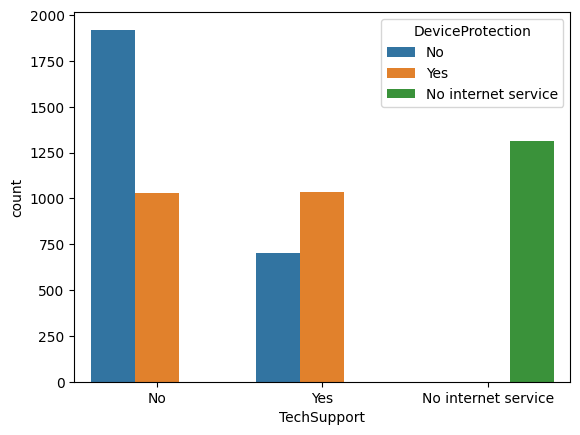

In [14]:
sns.countplot(x=dataChurn['TechSupport'], hue=dataChurn['DeviceProtection'], data=dataChurn)
plt.show()

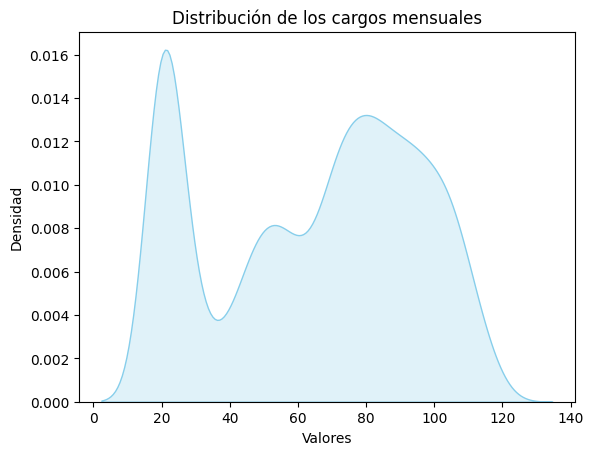

In [15]:
sns.kdeplot(dataChurn['MonthlyCharges'], fill=True, color="skyblue")
plt.title('Distribución de los cargos mensuales')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

Para realizar el analisis de la variable TotalCharges realizamos primero un manejo de datos ya que presenta valores vacios y es tipo Object (string)

In [16]:
dataChurn['TotalCharges'] = pd.to_numeric(dataChurn['TotalCharges'], errors='coerce')

In [17]:
dataChurn[dataChurn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
553,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
736,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1040,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3215,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3669,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
4507,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5859,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
5943,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


Para abordar los datos faltantes en la variable **TotalCharges**, hemos decidido utilizar una imputación basada en una lógica de negocio específica. En este enfoque, multiplicaremos la variable **tenure** (la duración del contrato del cliente) por la variable **MonthlyCharges** (los cargos mensuales) ya que esta operación refleja una relación cercana con la variable TotalCharges. Aunque esta imputación no es 100% precisa, ya que no tiene en cuenta factores como promociones o costos adicionales en el servicio, proporciona una aproximación bastante cercana de lo que podrían ser estos datos faltantes. Es importante tener en cuenta que esta estimación se basa en la relación existente entre la duración del contrato y los cargos mensuales, y no refleja necesariamente situaciones específicas como promociones u otros elementos que podrían afectar los cargos totales del cliente en la compañía.

Aunque para estos datos revisados estamos viendo que el tenure es 0, lo que sera 0, por eso para evitar el proceso los imputaremos con 0

In [18]:
dataChurn['TotalCharges'].fillna(0, inplace=True)

In [19]:
dataChurn[dataChurn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
#ponemos la variable dle tipo correcto
dataChurn['TotalCharges'] = dataChurn['TotalCharges'].astype(float)

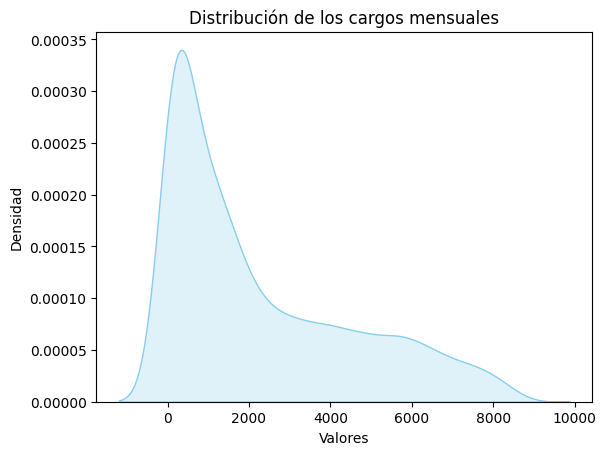

In [21]:
#continuamos con el analisis de datos exploratorio
sns.kdeplot(dataChurn['TotalCharges'], fill=True, color="skyblue")
plt.title('Distribución de los cargos mensuales')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

Existe una clara relación entre los cargos totales y la duración en la compañia lo que es logico que a mayor estancia se gasta mas y aumenta el total.

El anterior diagrama de violin muestra como cuando un cliente tiene soporte tenico aumenta la duracion en la compañia, lo que demuestra que es buena relacion con la variable tenure.

La posibilidad de la factura electronica no es una desicion para estar mucho tiempo en la compañia

In [22]:
dataChurn["MonthlyCharges"].min()

18.25

Los cargos mensuales varian desde los 18.25 USDs hasta los 118.75 USDs, una gran diferencia de pagos mensuales.

In [23]:
dataChurn["MonthlyCharges"].value_counts(dropna=False, normalize=True)

MonthlyCharges
20.05     0.008667
19.85     0.007000
20.00     0.006333
19.90     0.006333
19.65     0.006333
            ...   
63.15     0.000167
115.00    0.000167
67.60     0.000167
41.35     0.000167
62.30     0.000167
Name: proportion, Length: 1519, dtype: float64

In [24]:
dataChurn["MonthlyCharges"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    6000.000000
mean       64.607233
std        30.195382
min        18.250000
5%         19.650000
25%        35.000000
50%        70.300000
75%        89.850000
95%       107.500000
max       118.750000
Name: MonthlyCharges, dtype: float64

Los valores de interquartilicos tienen vocertura del valor mayor y el valor menor del cargo mensual aplicado a los usuarios

In [25]:
q1 = dataChurn["MonthlyCharges"].quantile(0.25)
q3 = dataChurn["MonthlyCharges"].quantile(0.75)
iqr = q3 - q1

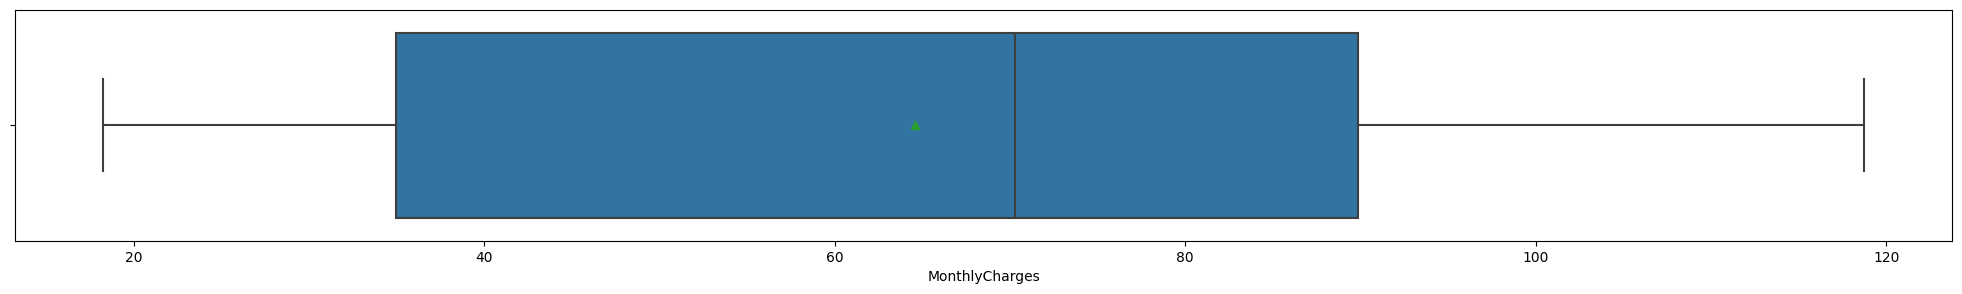

In [26]:
# Filtrar los valores atípicos
outliers = dataChurn[(dataChurn["MonthlyCharges"] < (q1 - 1.5 * iqr)) | (dataChurn["MonthlyCharges"] > (q3 + 1.5 * iqr))]

# Crear el boxplot
plt.figure(figsize=(25, 3))
sns.boxplot(x=dataChurn["MonthlyCharges"], showmeans=True, orient='h')

plt.show()

No se presentan valores atipicos, algo que se corroboro con los cuadrantes interquartilicos.

In [27]:
dataChurn["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

Presenta valores unicos de 0 y 1, sonde 0 no es adulto mayor, 1 es un adulto mayor

In [28]:
dataChurn["SeniorCitizen"].value_counts(dropna=False, normalize=True)

SeniorCitizen
0    0.839833
1    0.160167
Name: proportion, dtype: float64

La distribución muestra que la mayoria de usuarios no son adultos mayores.

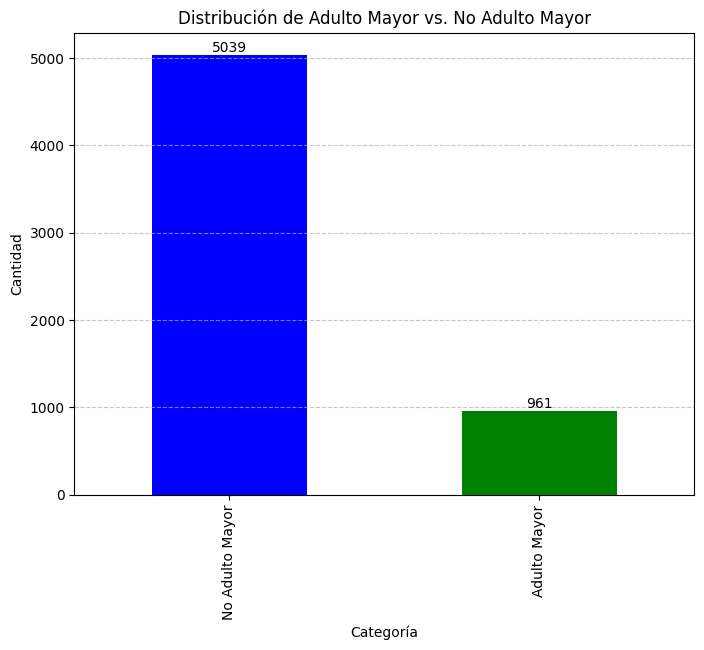

In [29]:
plt.figure(figsize=(8, 6))
# Transforma los valores 1 y 0 en "Adulto Mayor" y "No Adulto Mayor" solo para la visualización
value_counts = dataChurn['SeniorCitizen'].replace({1: "Adulto Mayor", 0: "No Adulto Mayor"}).value_counts()
ax = value_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribución de Adulto Mayor vs. No Adulto Mayor')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Agrega valores en las barras
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Agrega una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Grafica que representa la distribución de la variable categorica

In [30]:
dataChurn["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [31]:
dataChurn["MultipleLines"].value_counts(dropna=False, normalize=True)

MultipleLines
No                  0.480500
Yes                 0.421167
No phone service    0.098333
Name: proportion, dtype: float64

La distribución muestra que La mayoria de los usuarios no tienen multiples lineas, sin embargo, hay una gran distribución entre usuarios que no tienen multiples lineas y si tienen multiples lienas.

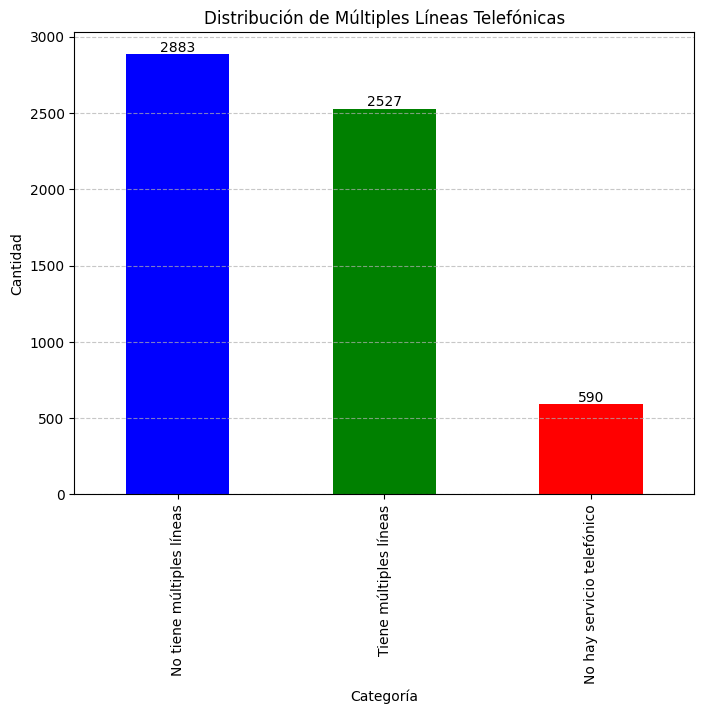

In [32]:
# Grafica la distribución sin modificar el DataFrame
plt.figure(figsize=(8, 6))
# Transforma los valores 0, 1 y "No phone service" para la visualización
value_counts = dataChurn['MultipleLines'].replace({"No": "No tiene múltiples líneas", "Yes": "Tiene múltiples líneas", "No phone service": "No hay servicio telefónico"}).value_counts()
ax = value_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribución de Múltiples Líneas Telefónicas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Agrega valores en las barras
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Agrega una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Rerpresentación grafica de la distribución de multiples lineasdataChurn["OnlineSecurity"].unique()

In [33]:
dataChurn["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No se Presentan valores diferentes a los esperados.

In [34]:
dataChurn["OnlineSecurity"].value_counts(dropna=False, normalize=True)

OnlineSecurity
No                     0.494167
Yes                    0.286667
No internet service    0.219167
Name: proportion, dtype: float64

La distribución muestra que La mayoria de los usuarios no tienen seguridad en linea, sin embargo, hay una gran distribución entre usuarios que tienen seguridad en linea y no tienen servicio de internet.

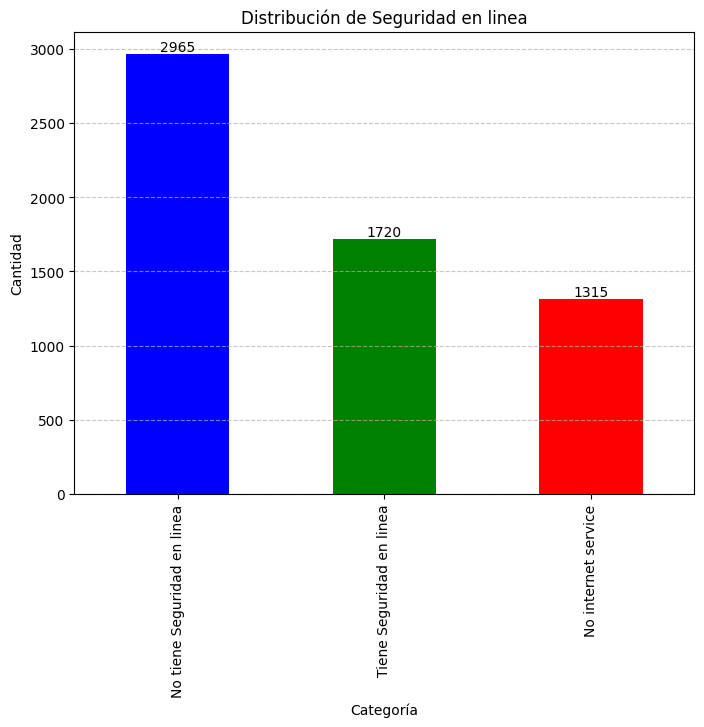

In [35]:
# Grafica la distribución sin modificar el DataFrame
plt.figure(figsize=(8, 6))
# Transforma los valores 0, 1 y "No phone service" para la visualización
value_counts = dataChurn['OnlineSecurity'].replace({"No": "No tiene Seguridad en linea", "Yes": "Tiene Seguridad en linea", "No phone service": "No hay servicio de internet"}).value_counts()
ax = value_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribución de Seguridad en linea')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Agrega valores en las barras
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Agrega una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Representación grafica de seguridad online.

In [36]:
dataChurn["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

No se Presentan valores diferentes a los esperados.

In [37]:
dataChurn["OnlineBackup"].value_counts(dropna=False, normalize=True)

OnlineBackup
No                     0.437167
Yes                    0.343667
No internet service    0.219167
Name: proportion, dtype: float64

La distribución muestra que La mayoria de los usuarios no tienen backup en linea.

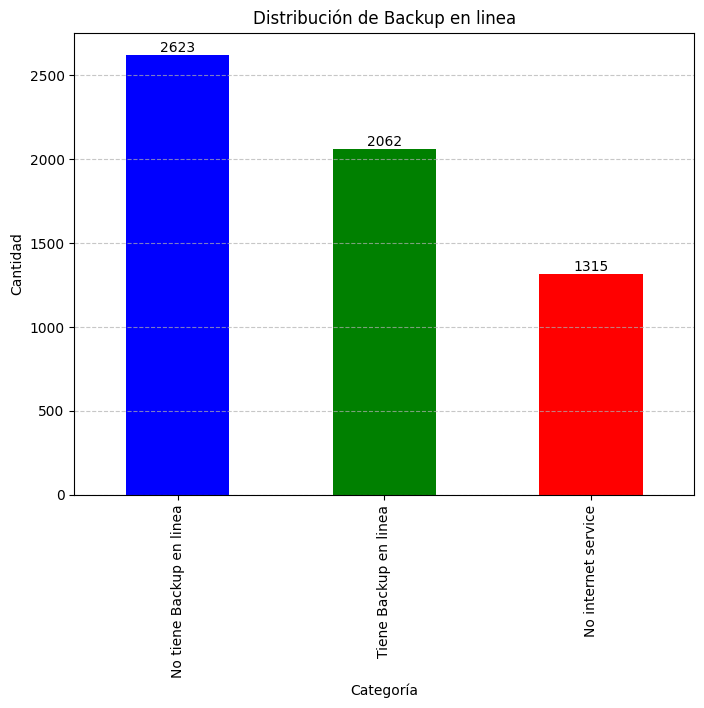

In [38]:
# Grafica la distribución sin modificar el DataFrame
plt.figure(figsize=(8, 6))
# Transforma los valores 0, 1 y "No phone service" para la visualización
value_counts = dataChurn['OnlineBackup'].replace({"No": "No tiene Backup en linea", "Yes": "Tiene Backup en linea", "No phone service": "No hay servicio telefónico"}).value_counts()
ax = value_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribución de Backup en linea')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Agrega valores en las barras
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Agrega una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Representación grafica de Backup en linea.

In [39]:
dataChurn["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

No se Presentan valores diferentes a los esperados.

In [40]:
dataChurn["StreamingMovies"].value_counts(dropna=False, normalize=True)

StreamingMovies
No                     0.392667
Yes                    0.388167
No internet service    0.219167
Name: proportion, dtype: float64

La muestra presenta una gran distribución entre los tres valores disponibles, sin embargo, la mayoria no cuentan con el servicio de streaming de peliculas.

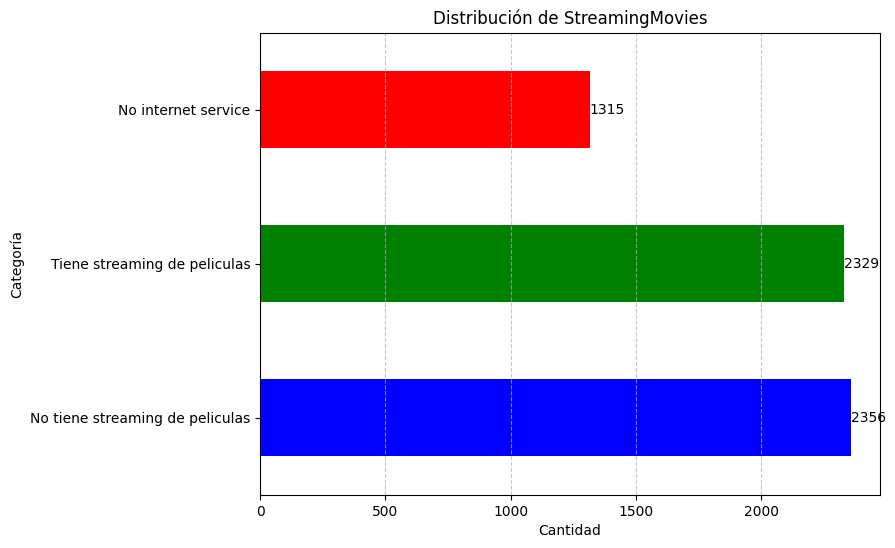

In [41]:
# Grafica la distribución sin modificar el DataFrame
plt.figure(figsize=(8, 6))
# Transforma los valores "No", "Yes" y "No internet service" solo para la visualización
value_counts = dataChurn['StreamingMovies'].replace({"No": "No tiene streaming de peliculas", "Yes": "Tiene streaming de peliculas", "No internet service": "No internet service"}).value_counts()
ax = value_counts.plot(kind='barh', color=['blue', 'green', 'red'])
plt.title('Distribución de StreamingMovies')
plt.ylabel('Categoría')
plt.xlabel('Cantidad')

# Agrega valores al final de las barras
for i, v in enumerate(value_counts):
    ax.text(v, i, str(v), ha='left', va='center')

# Agrega una cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [42]:
dataChurn["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

No se Presentan valores diferentes a los esperados.

In [43]:
dataChurn["Contract"].value_counts(dropna=False, normalize=True)

Contract
Month-to-month    0.548833
Two year          0.243167
One year          0.208000
Name: proportion, dtype: float64

El tipo de contrato mas solicitado es el mes a mes.

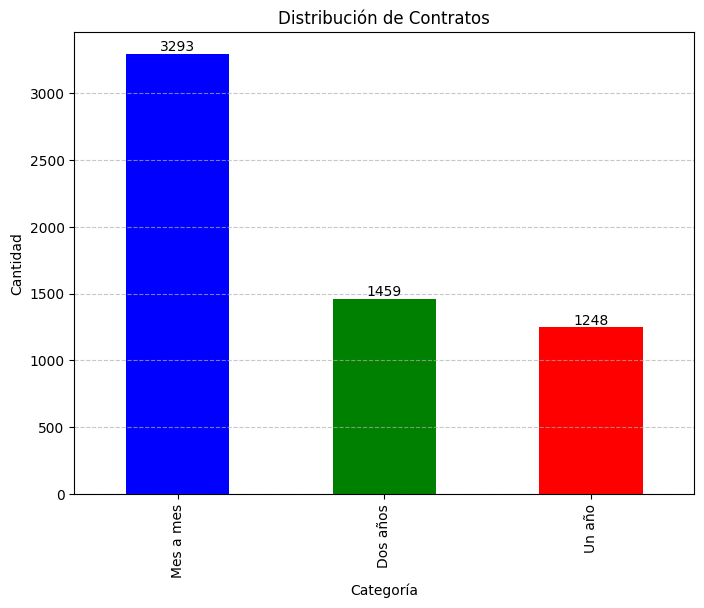

In [44]:
# Grafica la distribución sin modificar el DataFrame
plt.figure(figsize=(8, 6))
# Utilizamos los mismos valores para la visualización sin modificar los datos originales
value_counts = dataChurn['Contract'].replace({'Month-to-month': 'Mes a mes', 'One year': 'Un año', 'Two year': 'Dos años'}).value_counts()
ax = value_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribución de Contratos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Agrega valores en las barras
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Agrega una cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [45]:
dataChurn["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

No se Presentan valores diferentes a los esperados.

In [46]:
dataChurn["PaymentMethod"].value_counts(dropna=False, normalize=True)

PaymentMethod
Electronic check             0.338333
Mailed check                 0.230167
Credit card (automatic)      0.216500
Bank transfer (automatic)    0.215000
Name: proportion, dtype: float64

Se presenta una distribución uniforme entre los metodos de pago.

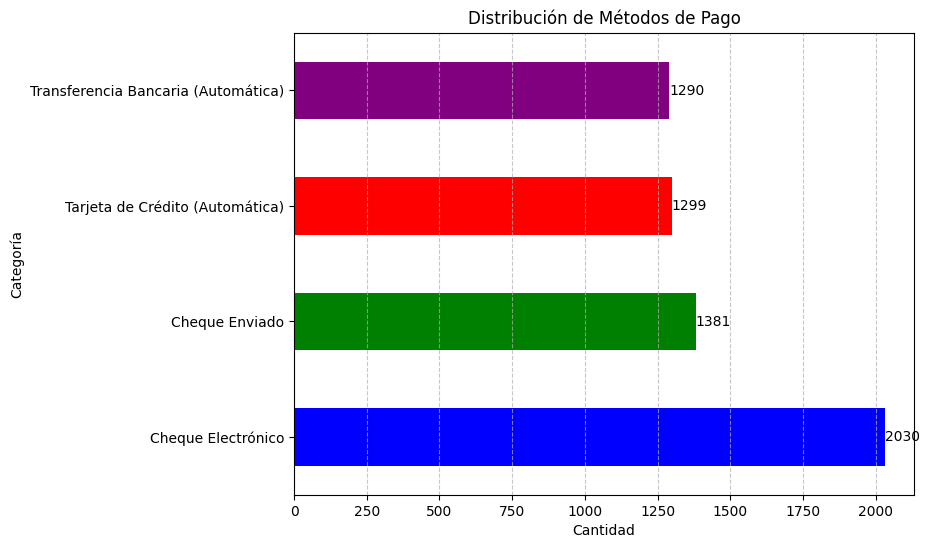

In [47]:
# Grafica la distribución sin modificar el DataFrame
plt.figure(figsize=(8, 6))
# Utilizamos los mismos valores para la visualización sin modificar los datos originales
value_counts = dataChurn['PaymentMethod'].replace({
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque Enviado',
    'Bank transfer (automatic)': 'Transferencia Bancaria (Automática)',
    'Credit card (automatic)': 'Tarjeta de Crédito (Automática)'
}).value_counts()
ax = value_counts.plot(kind='barh', color=['blue', 'green', 'red', 'purple'])
plt.title('Distribución de Métodos de Pago')
plt.ylabel('Categoría')
plt.xlabel('Cantidad')

# Agrega valores al final de las barras
for v, i in enumerate(value_counts):
    ax.text(i, v, str(i), ha='left', va='center')

# Agrega una cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [48]:
dataChurn["Churn"].unique()

array(['No', 'Yes'], dtype=object)

Solo se cuentas con dos valores, No y Yes, los cuales nos definen si el cliente cancela el producto o no.

In [49]:
dataChurn["Churn"].value_counts(dropna=False, normalize=True)

Churn
No     0.734667
Yes    0.265333
Name: proportion, dtype: float64

Los datos proporcionados nos dicen que >70% de los clientes si cancelan el producto o se dan de baja

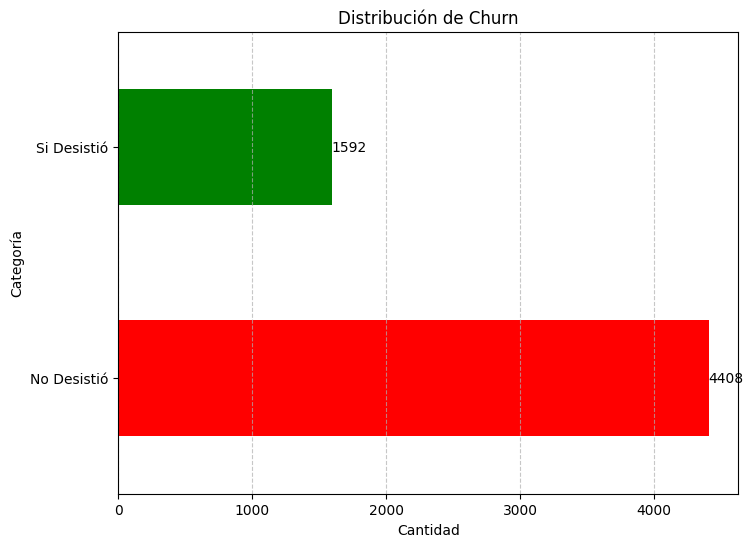

In [50]:
# Grafica la distribución de Churn
plt.figure(figsize=(8, 6))
value_counts = dataChurn['Churn'].replace({'No': 'No Desistió', 'Yes': 'Si Desistió'}).value_counts()
ax = value_counts.plot(kind='barh', color=['red', 'green'])
plt.title('Distribución de Churn')
plt.ylabel('Categoría')
plt.xlabel('Cantidad')

# Agrega valores al final de las barras
for v, i in enumerate(value_counts):
    ax.text(i, v, str(i), ha='left', va='center')

# Agrega una cuadrícula
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

## Analsisi Bivariado

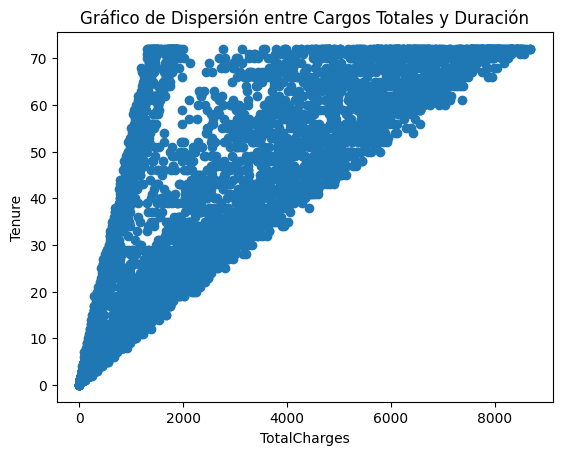

In [51]:
plt.scatter(dataChurn['TotalCharges'], dataChurn['tenure'])

# Etiquetas y título
plt.xlabel('TotalCharges')
plt.ylabel('Tenure')
plt.title('Gráfico de Dispersión entre Cargos Totales y Duración')

# Mostrar el gráfico
plt.show()

Existe una gran relacion entre la duración y los cargos totales del mes lo que es logico porque aumenta la cantida que gastan a lo largo del tiempo

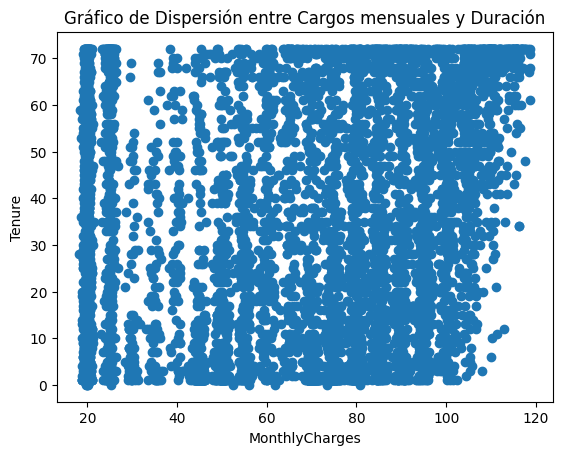

In [52]:
plt.scatter(dataChurn['MonthlyCharges'], dataChurn['tenure'])

# Etiquetas y título
plt.xlabel('MonthlyCharges')
plt.ylabel('Tenure')
plt.title('Gráfico de Dispersión entre Cargos mensuales y Duración')

# Mostrar el gráfico
plt.show()

No existe relación entre las variables

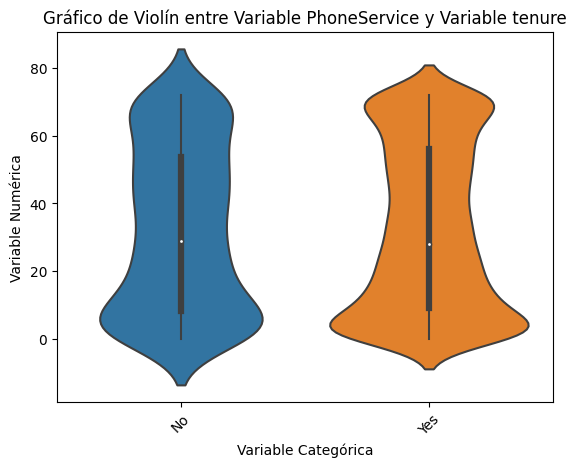

In [53]:
sns.violinplot(x='PhoneService', y='tenure', data=dataChurn)

plt.xlabel('Variable Categórica')
plt.ylabel('Variable Numérica')
plt.title('Gráfico de Violín entre Variable PhoneService y Variable tenure')

plt.xticks(rotation=45)

plt.show()

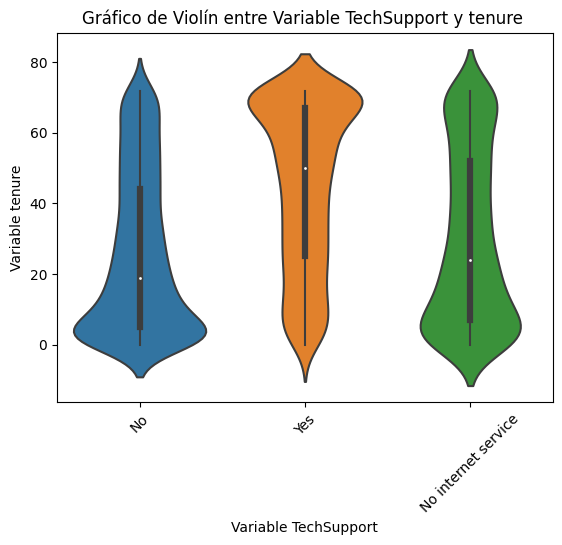

In [54]:
sns.violinplot(x='TechSupport', y='tenure', data=dataChurn)

plt.xlabel('Variable TechSupport')
plt.ylabel('Variable tenure')
plt.title('Gráfico de Violín entre Variable TechSupport y tenure ')

plt.xticks(rotation=45)

plt.show()


Los graficos de violin nos muestran que la media de la duracion delos clientes en la compañia tiende aumentar cuando este tiene soporte tenico

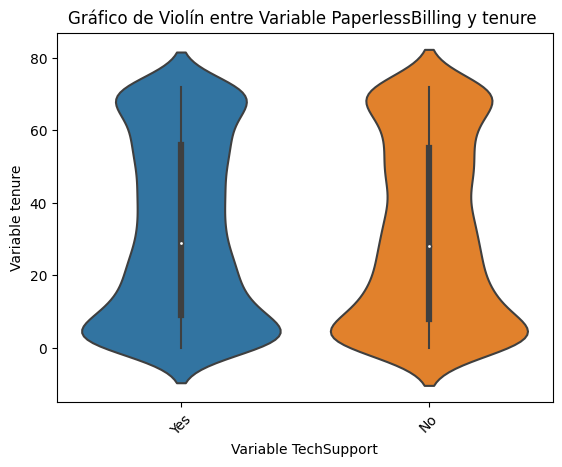

In [55]:
sns.violinplot(x='PaperlessBilling', y='tenure', data=dataChurn)

plt.xlabel('Variable TechSupport')
plt.ylabel('Variable tenure')
plt.title('Gráfico de Violín entre Variable PaperlessBilling y tenure ')

plt.xticks(rotation=45)

plt.show()

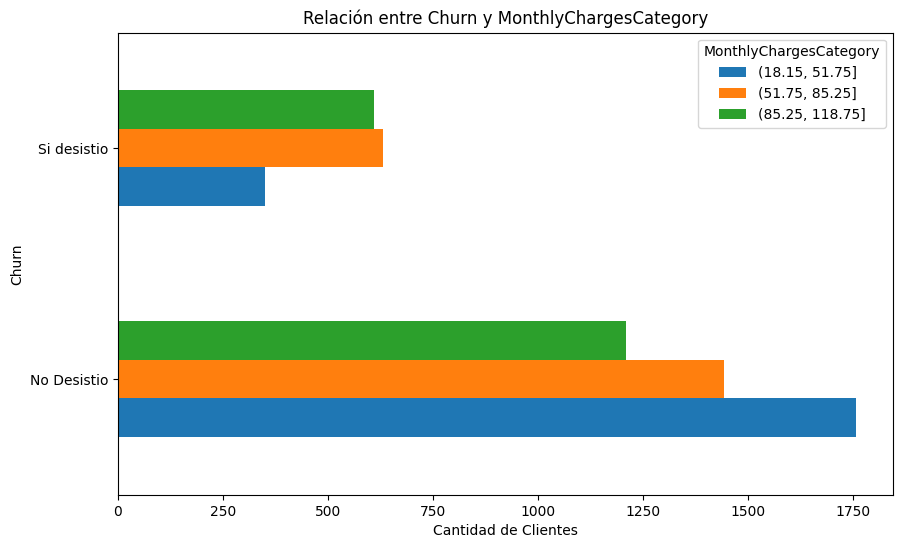

In [56]:
# Crea un DataFrame independiente para la gráfica
graph_df = dataChurn.copy()

# Discretiza MonthlyCharges en intervalos y crea una nueva columna MonthlyChargesCategory
graph_df['MonthlyChargesCategory'] = pd.cut(graph_df['MonthlyCharges'], bins=3)  # Discretiza en 3 categorías, puedes ajustar según tus necesidades

# Reemplaza los valores en la columna Churn
graph_df['Churn'] = graph_df['Churn'].replace({'No': 'No Desistio', 'Yes': 'Si desistio'})

# Crea una tabla de contingencia entre Churn y MonthlyChargesCategory
contingency_table = pd.crosstab(graph_df['Churn'], graph_df['MonthlyChargesCategory'])

# Crea un gráfico de barras horizontales
ax = contingency_table.plot(kind='barh', figsize=(10, 6))
plt.title('Relación entre Churn y MonthlyChargesCategory')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Churn')

plt.show()

la tendencia nos muestra que la mayoria de planes de los que desisten los clientes son los de menor valor, para las cartegorias de 18.15 USDs a 85.25 USDs.

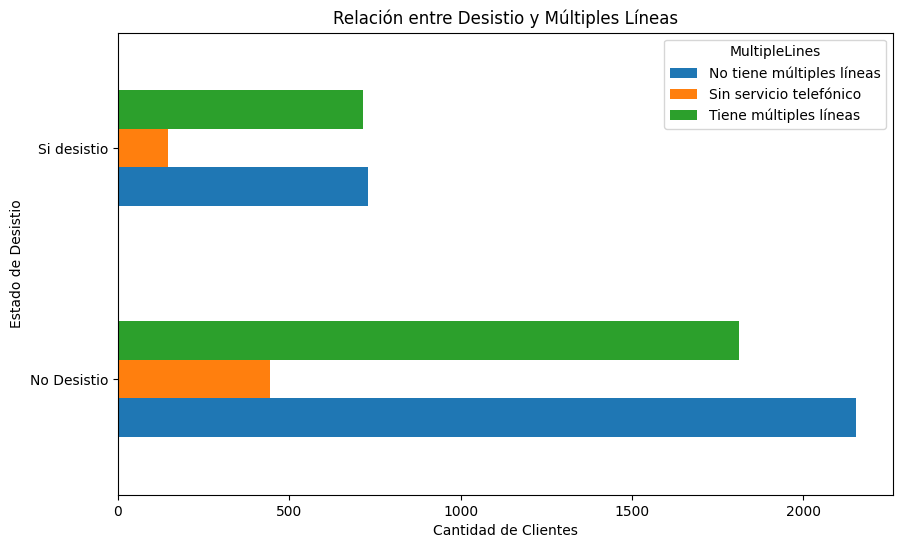

In [57]:
# Crea un nuevo DataFrame para respetar la gráfica anterior
graph_df = dataChurn.copy()

# Reemplaza los valores en la columna Churn
graph_df['Churn'] = graph_df['Churn'].replace({'No': 'No Desistio', 'Yes': 'Si desistio'})

# Reemplaza los valores en la columna MultipleLines en español
graph_df['MultipleLines'] = graph_df['MultipleLines'].replace({'No phone service': 'Sin servicio telefónico', 'No': 'No tiene múltiples líneas', 'Yes': 'Tiene múltiples líneas'})

# Crea una tabla de contingencia entre Churn y MultipleLines en el nuevo DataFrame
contingency_table = pd.crosstab(graph_df['Churn'], graph_df['MultipleLines'])

# Crea un gráfico de barras horizontales respetando la anterior gráfica
ax = contingency_table.plot(kind='barh', figsize=(10, 6))
plt.title('Relación entre Desistio y Múltiples Líneas')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Estado de Desistio')

plt.show()

Aunque la tendencia nos muestra que la mayoria de las personas que NO desisten pueden variar entre que tengan o no multiples lineas, la distribución mayor indica que son mas los que NO desisten quienes no tienen multiples lineas; para las personas que mas desisten se presenta una similitud entre estas mismas razones.

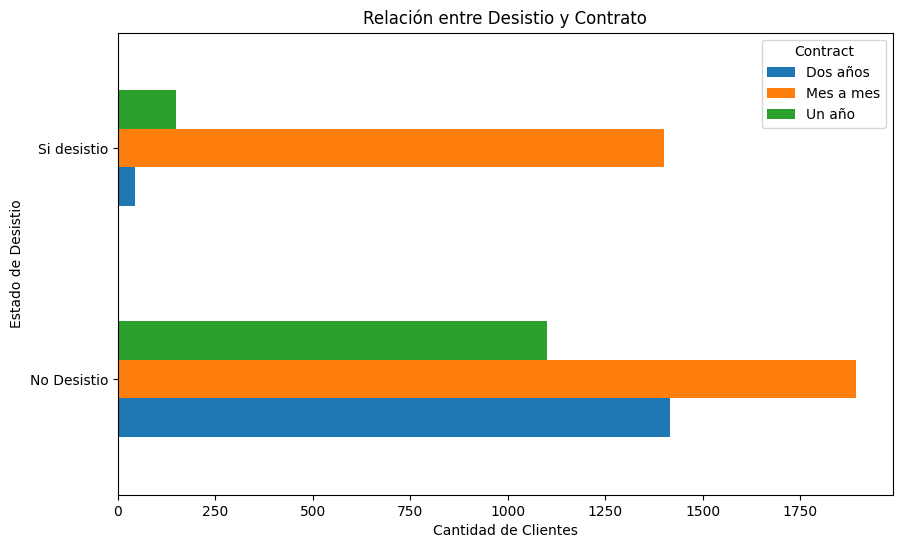

In [58]:
# Crea un nuevo DataFrame para respetar la gráfica anterior
graph_df = dataChurn.copy()

# Reemplaza los valores en la columna Churn
graph_df['Churn'] = graph_df['Churn'].replace({'No': 'No Desistio', 'Yes': 'Si desistio'})

# Reemplaza los valores en la columna Contract en español
graph_df['Contract'] = graph_df['Contract'].replace({'Month-to-month': 'Mes a mes', 'One year': 'Un año', 'Two year': 'Dos años'})

# Crea una tabla de contingencia entre Churn y Contract en el nuevo DataFrame
contingency_table = pd.crosstab(graph_df['Churn'], graph_df['Contract'])

# Crea un gráfico de barras horizontales respetando la anterior gráfica
ax = contingency_table.plot(kind='barh', figsize=(10, 6))
plt.title('Relación entre Desistio y Contrato')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Estado de Desistio')

plt.show()

La mayor cantidad que NO desisten son de Dos años, no se cuenta con una persistencia sobre el tipo de contrato de mes a mes, aunque tambien se presenta una cantidad considerable de personas que deciden continuar con el servicio.

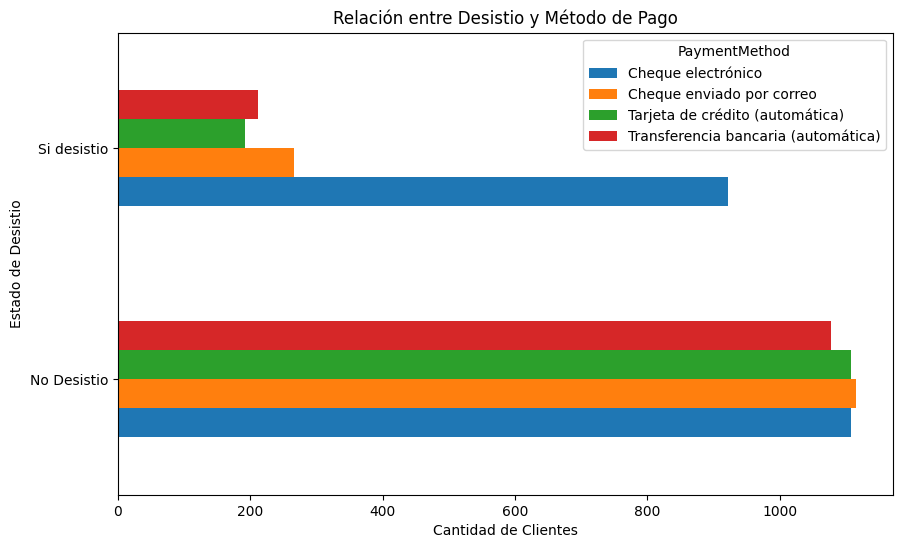

In [59]:
# Crea un nuevo DataFrame para respetar la gráfica anterior
graph_df = dataChurn.copy()

# Reemplaza los valores en la columna Churn
graph_df['Churn'] = graph_df['Churn'].replace({'No': 'No Desistio', 'Yes': 'Si desistio'})

# Reemplaza los valores en la columna PaymentMethod en español
graph_df['PaymentMethod'] = graph_df['PaymentMethod'].replace({
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque enviado por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)',
    'Credit card (automatic)': 'Tarjeta de crédito (automática)'
})

# Crea una tabla de contingencia entre Churn y PaymentMethod en el nuevo DataFrame
contingency_table = pd.crosstab(graph_df['Churn'], graph_df['PaymentMethod'])

# Crea un gráfico de barras horizontales respetando la anterior gráfica
ax = contingency_table.plot(kind='barh', figsize=(10, 6))
plt.title('Relación entre Desistio y Método de Pago')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Estado de Desistio')

plt.show()

Todas las categorias tienen un alto indice de personas que NO desisten, sin embargo, la mayor parte de personas que cancelan con cheque electronico han decidido por no continuar con algun plan.

# Creación de un Pipeline y primer modelo

In [60]:
# Define las columnas numéricas y categóricas
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner',
                        'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod']

In [61]:
dataChurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4933-BSAIP,Female,0,Yes,No,40,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,780.10,No
5996,2030-BTZRO,Male,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.40,107.60,No
5997,1116-DXXDF,Male,0,No,No,39,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,100.45,3801.70,No
5998,9274-CNFMO,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,74.95,308.70,Yes


In [62]:
# Transformador para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Transformador para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop=None))
])

In [63]:
#Combina los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [64]:
# Crea el pipeline completo, incluyendo el preprocesamiento y el modelo de regresión logística
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [65]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    unique_values = dataChurn[feature].unique()
    print(f'Valores únicos en la columna {feature}: {unique_values}')


Valores únicos en la columna gender: ['Female' 'Male']
Valores únicos en la columna SeniorCitizen: [0 1]
Valores únicos en la columna Partner: ['Yes' 'No']
Valores únicos en la columna Dependents: ['No' 'Yes']
Valores únicos en la columna PhoneService: ['No' 'Yes']
Valores únicos en la columna MultipleLines: ['No phone service' 'No' 'Yes']
Valores únicos en la columna InternetService: ['DSL' 'Fiber optic' 'No']
Valores únicos en la columna OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores únicos en la columna OnlineBackup: ['Yes' 'No' 'No internet service']
Valores únicos en la columna DeviceProtection: ['No' 'Yes' 'No internet service']
Valores únicos en la columna TechSupport: ['No' 'Yes' 'No internet service']
Valores únicos en la columna StreamingTV: ['No' 'Yes' 'No internet service']
Valores únicos en la columna StreamingMovies: ['No' 'Yes' 'No internet service']
Valores únicos en la columna Contract: ['Month-to-month' 'One year' 'Two year']
Valores únicos en la columna P

In [66]:
# Accede directamente al transformador One-Hot Encoding
categorical_transformer = pipeline.named_steps['preprocessor'].transformers[1][1]

In [67]:
# Crea el DataFrame con X (características) e y (variable objetivo)
X = dataChurn.drop('Churn', axis=1)
y = dataChurn['Churn']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 2. Ajustar el transformador One-Hot Encoding en el conjunto de entrenamiento
categorical_transformer.fit(X_train[categorical_features])

# 3. Obtener los nombres de las columnas transformadas
encoded_feature_names = categorical_transformer.get_feature_names_out(input_features=categorical_features)

In [68]:
# Imprime los nombres de las características después del preprocesamiento
print("Nombres de las características después del preprocesamiento:")
for feature_name in encoded_feature_names:
    print(feature_name)

Nombres de las características después del preprocesamiento:
gender_Female
gender_Male
SeniorCitizen_0
SeniorCitizen_1
Partner_No
Partner_Yes
Dependents_No
Dependents_Yes
PhoneService_No
PhoneService_Yes
MultipleLines_No
MultipleLines_No phone service
MultipleLines_Yes
InternetService_DSL
InternetService_Fiber optic
InternetService_No
OnlineSecurity_No
OnlineSecurity_No internet service
OnlineSecurity_Yes
OnlineBackup_No
OnlineBackup_No internet service
OnlineBackup_Yes
DeviceProtection_No
DeviceProtection_No internet service
DeviceProtection_Yes
TechSupport_No
TechSupport_No internet service
TechSupport_Yes
StreamingTV_No
StreamingTV_No internet service
StreamingTV_Yes
StreamingMovies_No
StreamingMovies_No internet service
StreamingMovies_Yes
Contract_Month-to-month
Contract_One year
Contract_Two year
PaperlessBilling_No
PaperlessBilling_Yes
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [69]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression())])

In [70]:
# Entrenar el modelo dentro del pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model', LogisticRegression())])

In [71]:
y_pred_train = pipeline.predict(X_train)

In [72]:
#Calcular métricas en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label='No')
recall_train = recall_score(y_train, y_pred_train, pos_label='No')
f1_train = f1_score(y_train, y_pred_train, pos_label='No')

# Imprimir métricas en el conjunto de entrenamiento
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Recall en el conjunto de entrenamiento:", recall_train)
print("Puntaje F1 en el conjunto de entrenamiento:", f1_train)

# También puedes imprimir un informe de clasificación para el conjunto de entrenamiento
print("\nInforme de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred_train))

Precisión en el conjunto de entrenamiento: 0.8064583333333334
Recall en el conjunto de entrenamiento: 0.8996617812852311
Puntaje F1 en el conjunto de entrenamiento: 0.8729659510460824

Informe de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      3548
         Yes       0.66      0.54      0.59      1252

    accuracy                           0.81      4800
   macro avg       0.75      0.72      0.73      4800
weighted avg       0.80      0.81      0.80      4800



In [73]:
# Supongamos que tienes tus etiquetas verdaderas en 'y_train' y las etiquetas predichas en 'y_pred_train'
confusion = confusion_matrix(y_train, y_pred_train)

print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[3192  356]
 [ 573  679]]


In [74]:
y_pred_test = pipeline.predict(X_test)

In [75]:
joblib.dump(pipeline, 'Models/LogisticRegression.joblib')

['Models/LogisticRegression.joblib']

In [76]:
#Calcular métricas en el conjunto de entrenamiento
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label='No')
recall_test = recall_score(y_test, y_pred_test, pos_label='No')
f1_test = f1_score(y_test, y_pred_test, pos_label='No')

# Imprimir métricas en el conjunto de entrenamiento
print("Precisión en el conjunto de entrenamiento:", accuracy_test)
print("Recall en el conjunto de entrenamiento:", recall_test)
print("Puntaje F1 en el conjunto de entrenamiento:", f1_test)

# También puedes imprimir un informe de clasificación para el conjunto de entrenamiento
print("\nInforme de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_test, y_pred_test))

Precisión en el conjunto de entrenamiento: 0.7958333333333333
Recall en el conjunto de entrenamiento: 0.9034883720930232
Puntaje F1 en el conjunto de entrenamiento: 0.8638132295719845

Informe de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

          No       0.83      0.90      0.86       860
         Yes       0.68      0.52      0.59       340

    accuracy                           0.80      1200
   macro avg       0.75      0.71      0.73      1200
weighted avg       0.79      0.80      0.79      1200



**Informe de Clasificación en el conjunto de entrenamiento**
- Precisión en el conjunto de entrenamiento: 0.8065. Esto significa que el 80.65% de las predicciones positivas (churn "Yes") son correctas. Es decir, el modelo tiene una buena precisión en predecir los clientes que abandonarán.

- Recall en el conjunto de entrenamiento: 0.8997. El recall mide la capacidad del modelo para identificar a todos los clientes que realmente abandonarán. Un valor alto de recall (89.97%) indica que el modelo captura la gran mayoría de los clientes que abandonarán.

- Puntaje F1 en el conjunto de entrenamiento: 0.8730. El puntaje F1 es una medida que combina precisión y recall en una sola métrica. Un valor alto del puntaje F1 (87.30%) indica un equilibrio entre precisión y recall.

En general, el modelo parece tener un buen rendimiento en la detección de clientes que se mantienen (clase "No"), pero puede haber margen de mejora en la detección de clientes que abandonan (clase "Yes"). Esto depende de los objetivos específicos del negocio y de si se prefiere reducir los falsos positivos (clientes erróneamente etiquetados como "Yes") o los falsos negativos (clientes que realmente abandonan pero se etiquetan como "No").

**Comportamiento de la matriz de confusión**

- Verdaderos positivos (TP): 679. Esto significa que el modelo predijo correctamente 679 clientes como "Yes" (abandonaron) y realmente abandonaron.

- Verdaderos negativos (TN): 3,192. El modelo predijo correctamente 3,192 clientes como "No" (se mantuvieron) y realmente se mantuvieron.

- Falsos positivos (FP): 356. El modelo predijo erróneamente 356 clientes como "Yes" (abandonaron), pero en realidad se mantuvieron.

- Falsos negativos (FN): 573. El modelo predijo erróneamente 573 clientes como "No" (se mantuvieron), pero en realidad abandonaron.

La matriz de confusión muestra cómo el modelo clasificó a los clientes en función de sus predicciones. En este caso, el modelo parece tener un número significativo de falsos positivos (clientes que se predijeron como "Yes" pero en realidad se mantuvieron). Esto se refleja en la puntuación de precisión más baja para la clase "Yes" en el informe de clasificación.

El modelo tiene un buen número de verdaderos positivos y verdaderos negativos, lo que sugiere que es efectivo para predecir a los clientes que realmente abandonarán y los que realmente se mantendrán. Sin embargo, la reducción de los falsos positivos podría ser una mejora potencial si deseas reducir el número de clientes incorrectamente etiquetados como "Yes".

**Modelo de Regresión Logística solo para ciertas variables**

In [77]:
# Define las columnas numéricas y categóricas
numeric_features1 = ['tenure']
categorical_features1 = [
                        'PhoneService', 'MultipleLines','Contract']

In [78]:
#Combina los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features1),
        ('cat', categorical_transformer, categorical_features1)
    ])

In [79]:
# Crea el pipeline completo, incluyendo el preprocesamiento y el modelo de regresión logística
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [80]:
# Entrenar el modelo dentro del pipeline
pipeline.fit(X_train, y_train)
# Ahora puedes usar el pipeline actualizado para hacer predicciones solo con las características seleccionadas
y_pred2 = pipeline.predict(X_train)


In [81]:
#Calcular métricas en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred2)
precision_train = precision_score(y_train, y_pred2, pos_label='No')
recall_train = recall_score(y_train, y_pred2, pos_label='No')
f1_train = f1_score(y_train, y_pred2, pos_label='No')

# Imprimir métricas en el conjunto de entrenamiento
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Recall en el conjunto de entrenamiento:", recall_train)
print("Puntaje F1 en el conjunto de entrenamiento:", f1_train)

# También puedes imprimir un informe de clasificación para el conjunto de entrenamiento
print("\nInforme de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_pred2))

Precisión en el conjunto de entrenamiento: 0.75625
Recall en el conjunto de entrenamiento: 0.9394024802705749
Puntaje F1 en el conjunto de entrenamiento: 0.850689127105666

Informe de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

          No       0.78      0.94      0.85      3548
         Yes       0.58      0.24      0.34      1252

    accuracy                           0.76      4800
   macro avg       0.68      0.59      0.59      4800
weighted avg       0.73      0.76      0.72      4800



In [82]:
# Supongamos que tienes tus etiquetas verdaderas en 'y_train' y las etiquetas predichas en 'y_pred_train'
confusion = confusion_matrix(y_train, y_pred2)

print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[3333  215]
 [ 955  297]]


- Precisión en el conjunto de entrenamiento: 0.75625. Esto significa que el 75.62% de las predicciones positivas (churn "Yes") son correctas. Es decir, el modelo tiene una buena precisión en predecir los clientes que abandonarán.

- Recall en el conjunto de entrenamiento: 0.9394. El recall mide la capacidad del modelo para identificar a todos los clientes que realmente abandonarán. Un valor alto de recall (93.94%) indica que el modelo captura la gran mayoría de los clientes que abandonarán.

- Puntaje F1 en el conjunto de entrenamiento: 0.8506. El puntaje F1 es una medida que combina precisión y recall en una sola métrica. Un valor alto del puntaje F1 (85.06%) indica un equilibrio entre precisión y recall.

En general, el modelo parece tener un buen rendimiento en la detección de clientes que se mantienen (clase "No"), pero puede haber margen de mejora en la detección de clientes que abandonan (clase "Yes"). Esto depende de los objetivos específicos del negocio y de si se prefiere reducir los falsos positivos (clientes erróneamente etiquetados como "Yes") o los falsos negativos (clientes que realmente abandonan pero se etiquetan como "No").

**Comportamiento de la matriz de confusión**

- Verdaderos positivos (TP): 297. Esto significa que el modelo predijo correctamente 679 clientes como "Yes" (abandonaron) y realmente abandonaron.

- Verdaderos negativos (TN): 3,333. El modelo predijo correctamente 3,192 clientes como "No" (se mantuvieron) y realmente se mantuvieron.

- Falsos positivos (FP): 955. El modelo predijo erróneamente 356 clientes como "Yes" (abandonaron), pero en realidad se mantuvieron.

- Falsos negativos (FN): 215. El modelo predijo erróneamente 573 clientes como "No" (se mantuvieron), pero en realidad abandonaron.

In [83]:
y_pred_test = pipeline.predict(X_test)

In [84]:
#Calcular métricas en el conjunto de entrenamiento
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, pos_label='No')
recall_test = recall_score(y_test, y_pred_test, pos_label='No')
f1_test = f1_score(y_test, y_pred_test, pos_label='No')

# Imprimir métricas en el conjunto de entrenamiento
print("Precisión en el conjunto de entrenamiento:", accuracy_test)
print("Recall en el conjunto de entrenamiento:", recall_test)
print("Puntaje F1 en el conjunto de entrenamiento:", f1_test)

# También puedes imprimir un informe de clasificación para el conjunto de entrenamiento
print("\nInforme de clasificación en el conjunto de entrenamiento:")
print(classification_report(y_test, y_pred_test))

Precisión en el conjunto de entrenamiento: 0.7441666666666666
Recall en el conjunto de entrenamiento: 0.95
Puntaje F1 en el conjunto de entrenamiento: 0.8418341061308603

Informe de clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

          No       0.76      0.95      0.84       860
         Yes       0.64      0.22      0.33       340

    accuracy                           0.74      1200
   macro avg       0.70      0.59      0.59      1200
weighted avg       0.72      0.74      0.70      1200



# Random Forest

In [85]:
#Combina los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [86]:
select_k_best = SelectKBest(score_func=f_classif, k=5) 
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Tu transformador de datos
    ('selectkbest', select_k_best),  #Elige las mejores variables
    ('classifier', RandomForestClassifier())  # Modelo de Random Forest

])

In [87]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5,6,7,8,9, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [88]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecu...
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('selectkbest', SelectKBest(k=5)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [5, 6, 7, 8, 9, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [89]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

In [90]:
# Mejor modelo (pipeline)
print("Mejor modelo (pipeline):")
print(best_pipeline)

# Hiperparámetros óptimos
print("Hiperparámetros óptimos:")
print(best_params)


Mejor modelo (pipeline):
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetSe

In [91]:
# Imprimir los hiperparámetros de cada etapa del pipeline
for step_name, step in best_pipeline.named_steps.items():
    print(f"Etapa del pipeline: {step_name}")
    if hasattr(step, 'get_params'):
        for param_name, param_value in step.get_params().items():
            print(f"{param_name}: {param_value}")
    print("\n")


Etapa del pipeline: preprocessor
n_jobs: None
remainder: drop
sparse_threshold: 0.3
transformer_weights: None
transformers: [('num', Pipeline(steps=[('scaler', StandardScaler())]), ['tenure', 'MonthlyCharges', 'TotalCharges']), ('cat', Pipeline(steps=[('onehot', OneHotEncoder())]), ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])]
verbose: False
verbose_feature_names_out: True
num: Pipeline(steps=[('scaler', StandardScaler())])
cat: Pipeline(steps=[('onehot', OneHotEncoder())])
num__memory: None
num__steps: [('scaler', StandardScaler())]
num__verbose: False
num__scaler: StandardScaler()
num__scaler__copy: True
num__scaler__with_mean: True
num__scaler__with_std: True
cat__memory: None
cat__steps: [('onehot', OneHotEncoder())]
cat__verbose: False
cat__onehot: OneHotEncoder()
cat__on

# Resultados de la Validación Cruzada

In [92]:
cv_results = grid_search.cv_results_

In [93]:
print("Resultados de la validación cruzada:")
for key, value in list(cv_results.items())[:9]:
    print(f"{key}: {value}")

Resultados de la validación cruzada:
mean_fit_time: [0.11415267 0.21213117 0.33842554 0.11222429 0.18112826 0.32413926
 0.11276531 0.17651472 0.30742764 0.10300598 0.17129054 0.31255989
 0.11878071 0.1747879  0.30509634 0.10094118 0.20973582 0.40058408
 0.14795146 0.21292238 0.33801351 0.11609058 0.17491469 0.34345322
 0.1055882  0.17520938 0.30725107 0.11291175 0.18492131 0.33247733
 0.10981927 0.1840683  0.35053358 0.11776152 0.19504452 0.35299649
 0.11291742 0.19449258 0.35621285 0.12480617 0.18379064 0.33466711
 0.10839043 0.18418455 0.33885269 0.11655302 0.19049487 0.34506049
 0.11043072 0.18238568 0.33583527 0.10844545 0.18448601 0.33667536
 0.11866746 0.19903784 0.36139846 0.12276235 0.21244812 0.36911087
 0.11908426 0.19969549 0.35927052 0.1137969  0.19806576 0.36321735
 0.11730127 0.19647512 0.37447567 0.13712277 0.21177816 0.41110973
 0.14003086 0.22321649 0.37671347 0.12146783 0.19796453 0.36019964
 0.11713443 0.19492602 0.35846853 0.12147126 0.21313162 0.41038089
 0.1217112

In [94]:
best_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('selectkbest', SelectKBest(k=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=4))])

In [95]:
# Hacer predicciones en un conjunto de prueba
y_pred = best_pipeline.predict(X_test)

In [96]:
y_pred_proba=best_pipeline.predict_proba(X_test)[:,1]
roc_auc=roc_auc_score(y_test,y_pred_proba)
print("ROC AUC en datos de prueba con los mejores hiperparámetros:",roc_auc)

y_pred_random_forest=best_pipeline.predict(X_test)
print("Informe de clasificación de datos de prueba:\n",classification_report(y_test,y_pred_random_forest))

ROC AUC en datos de prueba con los mejores hiperparámetros: 0.8301470588235293
Informe de clasificación de datos de prueba:
               precision    recall  f1-score   support

          No       0.81      0.91      0.85       860
         Yes       0.66      0.45      0.53       340

    accuracy                           0.78      1200
   macro avg       0.73      0.68      0.69      1200
weighted avg       0.76      0.78      0.76      1200



In [97]:
confusion_prueba = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(confusion_prueba)

Matriz de Confusión:
[[780  80]
 [187 153]]


In [98]:
# Hacer predicciones en un conjunto de entrenamiento
y_pred_train = best_pipeline.predict(X_train)

In [99]:
y_pred_proba_train=best_pipeline.predict_proba(X_train)[:,1]
roc_auc=roc_auc_score(y_train,y_pred_proba_train)
print("ROC AUC en datos de prueba con los mejores hiperparámetros:",roc_auc)

y_pred_random_forest=best_pipeline.predict(X_train)
print("Informe de clasificación de datos de entrenamiento:\n",classification_report(y_train,y_pred_random_forest))

ROC AUC en datos de prueba con los mejores hiperparámetros: 0.8358257003000384
Informe de clasificación de datos de entrenamiento:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      3548
         Yes       0.65      0.44      0.53      1252

    accuracy                           0.79      4800
   macro avg       0.74      0.68      0.70      4800
weighted avg       0.78      0.79      0.78      4800



In [100]:
joblib.dump(best_pipeline, 'Models/RadomForest.joblib')

['Models/RadomForest.joblib']

In [101]:
# Supongamos que tienes tus etiquetas verdaderas en 'y_train' y las etiquetas predichas en 'y_pred_train'
confusion_entrenamiento = confusion_matrix(y_train, y_pred_train)

print("Matriz de Confusión:")
print(confusion_entrenamiento)

Matriz de Confusión:
[[3255  293]
 [ 697  555]]


In [102]:

# Crea una Serie con las predicciones
predictions = pd.Series(data=y_pred, index=X_test.index, name='predicted_value')
_probas = best_pipeline.predict_proba(X_test)

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_test.index, columns=cols)

# Construye el conjunto de datos de resultados
results_test = X_test.join(predictions, how='left')
results_test = results_test.join(probabilities, how='left')
results_test = results_test.join(y_test, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_test = results_test.rename(columns={'y_test': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo


In [103]:
# Crear un DataFrame a partir de los resultados
results_test_random = pd.DataFrame(results_test)



In [104]:
results_test_random.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
1782,2530-FMFXO,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,...,Yes,Two year,Yes,Electronic check,103.20,5873.75,No,0.806904,0.193096,No
3917,1202-KKGFU,Female,0,Yes,No,12,Yes,No,DSL,Yes,...,No,Month-to-month,No,Bank transfer (automatic),54.20,690.50,No,0.837400,0.162600,No
221,9880-TDQAC,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,Yes,Two year,Yes,Electronic check,60.00,4264.00,No,0.885222,0.114778,No
2135,2000-DHJUY,Female,1,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),92.20,6474.45,No,0.954531,0.045469,No
5224,9835-ZIITK,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Electronic check,110.85,7491.75,No,0.856217,0.143783,Yes
1168,9480-BQJEI,Male,0,No,No,62,Yes,Yes,Fiber optic,Yes,...,Yes,One year,Yes,Bank transfer (automatic),92.30,5731.45,No,0.929559,0.070441,No
879,5461-QKNTN,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,94.30,3953.15,No,0.655573,0.344427,No
156,7017-VFHAY,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,No,Credit card (automatic),115.10,7008.15,No,0.957794,0.042206,No
1657,2189-UXTKY,Female,0,Yes,No,22,Yes,Yes,DSL,Yes,...,Yes,Month-to-month,Yes,Electronic check,79.20,1742.75,No,0.765285,0.234715,Yes
323,6825-UYPFK,Female,0,No,No,23,Yes,Yes,Fiber optic,No,...,No,Month-to-month,No,Bank transfer (automatic),75.60,1758.60,No,0.680846,0.319154,Yes


In [105]:
# Crea una Serie con las predicciones
predictions = pd.Series(data=y_pred_train, index=X_train.index, name='predicted_value')

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

_probas = best_pipeline.predict_proba(X_train)
# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_train.index, columns=cols)

# Construye el conjunto de datos de resultados
results_train = X_train.join(predictions, how='left')
results_train= results_train.join(probabilities, how='left')
results_train = results_train.join(y_train, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_train = results_train.rename(columns={'y_train': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo


In [106]:
# Crear un DataFrame a partir de los resultados
results_train_random = pd.DataFrame(results_train)

In [107]:
results_train.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
3897,0813-TAXXS,Male,0,No,No,55,Yes,Yes,DSL,No,...,Yes,Two year,Yes,Bank transfer (automatic),77.80,4323.35,No,0.852436,0.147564,No
5628,9137-UIYPG,Female,0,Yes,Yes,35,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,106.90,3756.45,No,0.839501,0.160499,No
1756,2737-YNGYW,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Month-to-month,No,Electronic check,80.55,184.10,Yes,0.341387,0.658613,Yes
2346,5480-XTFFL,Female,0,Yes,Yes,31,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,21.00,697.70,No,0.958059,0.041941,No
2996,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,55.15,742.90,No,0.958914,0.041086,No
1595,8000-REIQB,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,69.95,69.95,Yes,0.247040,0.752960,Yes
5966,9572-WUKSB,Male,0,Yes,No,3,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.90,92.25,Yes,0.463618,0.536382,No
3252,0365-BZUWY,Male,0,Yes,No,17,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,102.55,1742.50,Yes,0.484532,0.515468,No
829,3452-ABWRL,Male,1,No,No,47,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),86.05,3865.60,No,0.717433,0.282567,No
5864,4186-ZBUEW,Female,0,No,No,36,Yes,Yes,DSL,No,...,Yes,One year,Yes,Mailed check,70.70,2511.95,No,0.890356,0.109644,No


In [108]:
# Contar el número de registros en el conjunto de prueba (test)
num_records_test = len(results_test_random)
print(f"Número de registros en el conjunto de prueba (test): {num_records_test}")

# Contar el número de registros en el conjunto de entrenamiento (train)
num_records_train = len(results_train_random)
print(f"Número de registros en el conjunto de entrenamiento (train): {num_records_train}")


Número de registros en el conjunto de prueba (test): 1200
Número de registros en el conjunto de entrenamiento (train): 4800


# Características del Modelo de Random Forest

El clasificador utilizado es un RandomForestClassifier con restricciones en la profundidad del árbol (max_depth) y los umbrales de división (min_samples_leaf y min_samples_split). Esto sugiere que el modelo está regularizado para evitar el sobreajuste y mejorar la generalización.El número de estimadores es de 100 lo que indica que se utilizan múltiples árboles de decisión para la estimación más óptima.

- ROC AUC en datos de prueba con los mejores hiperparámetros: 0.8290 El valor del área bajo la curva ROC es 0.82, lo que indica que el modelo tiene un buen rendimiento en la clasificación de los datos de prueba.

**Métricas de rendimiento del conjunto de prueba**

- Precision: La precisión para la clase "No" (Clientes que no abandonan) es 0.81 y para la clase "Yes" (Clientes que abandonan) es 0.65 Esto significa que el modelo tiene una buena precisión en la clasificación de cada una de estas categorias.
- Recall: El recall para la clase "No" (Clientes que no abandonan) es 0.90 y para la clase "Yes" (Clientes que abandonan) es 0.45. Esto indica la capacidad del modelo para capturar la mayoría de los casos de ambas clases.
- F1-score: El F1-score para la clase "No" (Clientes que no abandonan) es 0.85 y para la clase "Yes" (Clientes que abandonan)  es 0.53. El F1-score combina precisión y recall en una sola métrica. Esto sugiere que el modelo es mejor prediciendo aquellos clientes que se quedarán y no es igual de eficiente en aquellos que se irán.
- Precisión: La precisión general del modelo en el conjunto de prueba es del 78%, lo que indica que acierta en el 78% de las predicciones.

**Conjunto de entrenamiento**

ROC AUC en datos de entrenamiento: Esta métrica, con un valor de 0.8349, indica la capacidad del modelo para distinguir entre las clases en el conjunto de prueba. Un valor más cercano a 1 sugiere un buen poder de discriminación, sin embargo, es importante evitar el sobreajuste de los datos.

**Métricas de rendimiento para el conjunto de entrenamiento**

- Precisión para "No": El 82% de las predicciones de "No" (Clientes no abandonan) son correctas en el conjunto de entrenamiento.
- Recall para "No": El 92% de los casos reales de "No" (Clientes no abandonan) se capturan en el conjunto de entrenamiento.
- F1-score para "No" (Clientes no abandonan): El valor del F1-score es 0.87, lo que indica un buen equilibrio entre precisión y recall para "No" (Clientes no abandonan).
- Precisión para "Yes" (Clientes abandonan): El 65% de las predicciones de "Yes" (Clientes abandonan) son correctas en el conjunto de entrenamiento.
- Recall para "Yes" (Clientes abandonan): El 44% de los casos reales de "Yes" (Clientes abandonan) se capturan en el conjunto de entrenamiento.
- F1-score para "Yes" (Clientes abandonan): El valor del F1-score es 0.53, lo que también indica un equilibrio entre precisión y recall para "Yes"(Clientes abandonan).
- Precisión: En el conjunto de entrenamiento, la exactitud es del 79%, lo que significa que el modelo acierta en el 79% de las predicciones en total.

# Matriz de confusión

**Datos de prueba**

- Verdaderos positivos (TP): 153. Esto significa que el modelo predijo correctamente 167 clientes como "Yes" (abandonaron) y realmente abandonaron.

- Verdaderos negativos (TN): 778. El modelo predijo correctamente 784 clientes como "No" (se mantuvieron) y realmente se mantuvieron.

- Falsos positivos (FP): 187. El modelo predijo erróneamente 173 clientes como "Yes" (abandonaron), pero en realidad se mantuvieron.

- Falsos negativos (FN): 82. El modelo predijo erróneamente 76 clientes como "No" (se mantuvieron), pero en realidad abandonaron.

**Datos de entrenamiento**

- Verdaderos positivos (TP): 557. Esto significa que el modelo predijo correctamente 672 clientes como "Yes" (abandonaron) y realmente abandonaron.

- Verdaderos negativos (TN): 3.254. El modelo predijo correctamente 3.282 clientes como "No" (se mantuvieron) y realmente se mantuvieron.

- Falsos positivos (FP): 695. El modelo predijo erróneamente 580 clientes como "Yes" (abandonaron), pero en realidad se mantuvieron.

- Falsos negativos (FN): 294. El modelo predijo erróneamente 266 clientes como "No" (se mantuvieron), pero en realidad abandonaron.

# 1. ¿Se evidencian problemas de overfitting o underfitting?

Diferencia en ROC AUC entre datos de prueba (0.8290) y datos de entrenamiento (0.8349): Existe una ligera disparidad entre el valor de ROC AUC en datos de prueba y datos de entrenamiento, siendo ligeramente superior en los datos de entrenamiento. Esta disparidad podría indicar cierta variabilidad en el rendimiento del modelo en diferentes conjuntos de datos, aunque no necesariamente sugiere un problema de sobreajuste (overfitting) o subajuste (underfitting). De igual manera, podemos observar que ambos conjuntos de datos tanto el de prueba como el de entrenamiento evidencian un desempeño similar lo que se refleja en que no existe una brecha sustancial entre los mismos. Asimismo, la precisión en datos de prueba es del 78%, mientras que en datos de entrenamiento es del 79%. Esta diferencia no es significativa y no sugiere un problema de sobreajuste importante.


En resumen, no parece haber un problema evidente de sobreajuste o subajuste en este escenario. El modelo parece generalizar adecuadamente en datos de prueba, y las métricas en ambos conjuntos de datos son coherentes. La ligera discrepancia en el valor de ROC AUC podría atribuirse a la variabilidad natural de los datos de prueba, pero no indica un problema sustancial

# 2. ¿Cómo solucionarlos y a la vez continuar mejorando la capacidad predictiva del modelo?


Para mejorar la capacidad predictiva del modelo, es fundamental considerar estrategias como el equilibrio de clases y la selección de características relevantes. El equilibrio de clases es crucial cuando una de las clases está sobrerepresentada en comparación con la otra, ya que puede llevar a un sesgo en el modelo. En este ejercicio específico, no se observa un desequilibrio significativo entre las clases "No" y "Yes", lo que indica que esta estrategia puede no ser necesaria. Por otro lado, la selección de características es valiosa para reducir la dimensionalidad y destacar las variables más influyentes en el modelo. Sin embargo, en este caso, los resultados de validación sugieren que la eliminación de características no conduce a una mejora en el desempeño del modelo.

Una alternativa a considerar es el aumento de datos, que implica generar más ejemplos de la clase minoritaria en los datos de entrenamiento. Esta técnica puede ser efectiva para mejorar el rendimiento en la detección de la clase minoritaria y garantizar que el modelo generalice adecuadamente. La elección de la estrategia adecuada para mejorar la capacidad predictiva debe basarse en una comprensión sólida de los datos y los objetivos específicos del negocio, ya que no existe una solución única y cada caso puede requerir enfoques personalizados.

In [109]:
#Exportar RandomForest

In [110]:
#Aca dejamos una manera explicativa de como realizar la prediccion a un modelo de Random Forest
registroN=462
registro_nuevo_df = X_test.iloc[[registroN], :]
best_pipeline.predict(registro_nuevo_df)[0]

'Yes'

## XGBoost

In [111]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

En este modelo, se realiza una transformación específica en la variable de salida, Y_train. Es importante destacar que esta transformación difiere de las modificaciones convencionales aplicadas a los datos de entrada y, por lo tanto, se lleva a cabo fuera del pipeline. Esta distinción resalta el tratamiento especial que requiere la variable objetivo y asegura que cualquier ajuste específico se realice de manera transparente, sin interferir con el flujo estándar de transformaciones aplicadas a los datos de entrada dentro del pipeline

In [112]:
select_k_best = SelectKBest(f_classif)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Tu transformador de datos
    ('selectkbest', select_k_best),
    ('classifier', XGBClassifier())  # Modelo de XGBoost
])


In [113]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 6, 7, 8, 9, 10, 20, 30],
    'classifier__min_child_weight': [1, 2, 4],  # Cambiar a min_child_weight en lugar de min_samples_split
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0],  # Agregar subsample
    'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Agregar colsample_bytree
}

In [114]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecu...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'classifier__max_depth': [5, 6, 7, 8, 9, 10, 20, 30],
                         'classifier__min_child_weight': [1, 2, 4],
                         'classifier__n_estimators': [50, 100, 200],
                         'classifier__subsample': [0.7, 0.8, 0.9, 1.0]})

In [115]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

In [116]:
# Mejor modelo (pipeline)
print("Mejor modelo (pipeline):")
print(best_pipeline)

# Hiperparámetros óptimos
print("Hiperparámetros óptimos:")
print(best_params)

Mejor modelo (pipeline):
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetSe

In [117]:
# Imprimir los hiperparámetros de cada etapa del pipeline
for step_name, step in best_pipeline.named_steps.items():
    print(f"Etapa del pipeline: {step_name}")
    if hasattr(step, 'get_params'):
        for param_name, param_value in step.get_params().items():
            print(f"{param_name}: {param_value}")
    print("\n")


Etapa del pipeline: preprocessor
n_jobs: None
remainder: drop
sparse_threshold: 0.3
transformer_weights: None
transformers: [('num', Pipeline(steps=[('scaler', StandardScaler())]), ['tenure', 'MonthlyCharges', 'TotalCharges']), ('cat', Pipeline(steps=[('onehot', OneHotEncoder())]), ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])]
verbose: False
verbose_feature_names_out: True
num: Pipeline(steps=[('scaler', StandardScaler())])
cat: Pipeline(steps=[('onehot', OneHotEncoder())])
num__memory: None
num__steps: [('scaler', StandardScaler())]
num__verbose: False
num__scaler: StandardScaler()
num__scaler__copy: True
num__scaler__with_mean: True
num__scaler__with_std: True
cat__memory: None
cat__steps: [('onehot', OneHotEncoder())]
cat__verbose: False
cat__onehot: OneHotEncoder()
cat__on

In [118]:
cv_results = grid_search.cv_results_

In [119]:
print("Resultados de la validación cruzada:")
for key, value in list(cv_results.items())[:9]:
    print(f"{key}: {value}")

Resultados de la validación cruzada:
mean_fit_time: [0.28044281 0.22658076 0.16826167 ... 0.31775808 0.33617902 0.27590885]
std_fit_time: [0.03566092 0.02434938 0.00930869 ... 0.01200519 0.00640443 0.02110643]
mean_score_time: [0.02878666 0.02563992 0.02286353 ... 0.03360133 0.03042707 0.02593474]
std_score_time: [0.00153973 0.00266661 0.00427587 ... 0.00098655 0.00397244 0.00154609]
param_classifier__colsample_bytree: [0.7 0.7 0.7 ... 1.0 1.0 1.0]
param_classifier__max_depth: [5 5 5 ... 30 30 30]
param_classifier__min_child_weight: [1 1 1 ... 4 4 4]
param_classifier__n_estimators: [50 50 50 ... 200 200 200]
param_classifier__subsample: [0.7 0.8 0.9 ... 0.8 0.9 1.0]


In [120]:
best_pipeline.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'Device...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [121]:
joblib.dump(best_pipeline, 'Models/Gxboost.joblib')

['Models/Gxboost.joblib']

In [122]:
# Hacer predicciones en un conjunto de prueba
y_pred = best_pipeline.predict(X_test)

In [123]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

roc_auc = roc_auc_score(y_test_encoded, y_pred)
print("ROC AUC en datos de prueba con los mejores hiperparámetros:", roc_auc)

print("Informe de clasificación de datos de prueba:\n", classification_report(y_test_encoded, y_pred))

ROC AUC en datos de prueba con los mejores hiperparámetros: 0.7065663474692203
Informe de clasificación de datos de prueba:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       860
           1       0.64      0.53      0.58       340

    accuracy                           0.78      1200
   macro avg       0.73      0.71      0.72      1200
weighted avg       0.77      0.78      0.78      1200



In [124]:
confusion_prueba = confusion_matrix(y_test_encoded, y_pred)

print("Matriz de Confusión:")
print(confusion_prueba)

Matriz de Confusión:
[[760 100]
 [160 180]]


In [125]:
# Hacer predicciones en un conjunto de entrenamiento
y_pred_train = best_pipeline.predict(X_train)

In [126]:
from sklearn.preprocessing import LabelEncoder
y_pred_proba_train=best_pipeline.predict(X_train)
# Suponiendo que tienes y_train como las etiquetas de clase originales ('No' y 'Yes')
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Luego, puedes calcular el ROC AUC y el informe de clasificación con las etiquetas codificadas
roc_auc_train = roc_auc_score(y_train_encoded, y_pred_proba_train)
print("ROC AUC en datos de entrenamiento con los mejores hiperparámetros:", roc_auc_train)

print("Informe de clasificación de datos de entrenamiento:\n", classification_report(y_train_encoded, y_pred_proba_train))


ROC AUC en datos de entrenamiento con los mejores hiperparámetros: 0.7456862706253985
Informe de clasificación de datos de entrenamiento:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      3548
           1       0.69      0.58      0.63      1252

    accuracy                           0.82      4800
   macro avg       0.77      0.75      0.76      4800
weighted avg       0.82      0.82      0.82      4800



In [127]:
# Supongamos que tienes tus etiquetas verdaderas en 'y_train' y las etiquetas predichas en 'y_pred_train'

label_encoder = LabelEncoder()
y_train_encoded_pred = label_encoder.fit_transform(y_pred_train)
y_train_encoded = label_encoder.fit_transform(y_train)

confusion_entrenamiento = confusion_matrix(y_train_encoded, y_train_encoded_pred)

print("Matriz de Confusión:")
print(confusion_entrenamiento)

Matriz de Confusión:
[[3217  331]
 [ 520  732]]


In [128]:
# Suponiendo que ya has ajustado `best_pipeline` con los mejores hiperparámetros
y_pred = best_pipeline.predict(X_test)

# Crea una Serie con las predicciones
predictions = pd.Series(data=y_pred, index=X_test.index, name='predicted_value')
_probas = best_pipeline.predict_proba(X_test)

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_test.index, columns=cols)

# Construye el conjunto de datos de resultados
results_test = X_test.join(predictions, how='left')
results_test = results_test.join(probabilities, how='left')
results_test = results_test.join(y_test, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_test = results_test.rename(columns={'y_test': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo


In [129]:
# Crear un DataFrame a partir de los resultados
results_test_xgboost = pd.DataFrame(results_test)

In [130]:
results_test_xgboost.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
1782,2530-FMFXO,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,...,Yes,Two year,Yes,Electronic check,103.20,5873.75,0,0.778821,0.221179,No
3917,1202-KKGFU,Female,0,Yes,No,12,Yes,No,DSL,Yes,...,No,Month-to-month,No,Bank transfer (automatic),54.20,690.50,0,0.761771,0.238229,No
221,9880-TDQAC,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,Yes,Two year,Yes,Electronic check,60.00,4264.00,0,0.980294,0.019706,No
2135,2000-DHJUY,Female,1,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),92.20,6474.45,0,0.977833,0.022167,No
5224,9835-ZIITK,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Electronic check,110.85,7491.75,0,0.852660,0.147340,Yes
1168,9480-BQJEI,Male,0,No,No,62,Yes,Yes,Fiber optic,Yes,...,Yes,One year,Yes,Bank transfer (automatic),92.30,5731.45,0,0.911756,0.088244,No
879,5461-QKNTN,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,94.30,3953.15,1,0.374110,0.625890,No
156,7017-VFHAY,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,No,Credit card (automatic),115.10,7008.15,0,0.920539,0.079461,No
1657,2189-UXTKY,Female,0,Yes,No,22,Yes,Yes,DSL,Yes,...,Yes,Month-to-month,Yes,Electronic check,79.20,1742.75,0,0.520867,0.479133,Yes
323,6825-UYPFK,Female,0,No,No,23,Yes,Yes,Fiber optic,No,...,No,Month-to-month,No,Bank transfer (automatic),75.60,1758.60,0,0.750996,0.249004,Yes


In [131]:
# Crea una Serie con las predicciones
predictions = pd.Series(data=y_pred_train, index=X_train.index, name='predicted_value')

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

_probas = best_pipeline.predict_proba(X_train)
# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_train.index, columns=cols)

# Construye el conjunto de datos de resultados
results_train = X_train.join(predictions, how='left')
results_train= results_train.join(probabilities, how='left')
results_train = results_train.join(y_train, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_train = results_train.rename(columns={'y_train': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo


In [132]:
# Crear un DataFrame a partir de los resultados
results_train_xgboost = pd.DataFrame(results_train)

In [133]:
results_train_xgboost.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
3897,0813-TAXXS,Male,0,No,No,55,Yes,Yes,DSL,No,...,Yes,Two year,Yes,Bank transfer (automatic),77.80,4323.35,0,0.964170,0.035830,No
5628,9137-UIYPG,Female,0,Yes,Yes,35,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,106.90,3756.45,0,0.859409,0.140591,No
1756,2737-YNGYW,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Month-to-month,No,Electronic check,80.55,184.10,1,0.302343,0.697657,Yes
2346,5480-XTFFL,Female,0,Yes,Yes,31,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,21.00,697.70,0,0.991354,0.008646,No
2996,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,55.15,742.90,0,0.895396,0.104604,No
1595,8000-REIQB,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,69.95,69.95,1,0.117809,0.882191,Yes
5966,9572-WUKSB,Male,0,Yes,No,3,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.90,92.25,1,0.460387,0.539613,No
3252,0365-BZUWY,Male,0,Yes,No,17,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,102.55,1742.50,1,0.477481,0.522519,No
829,3452-ABWRL,Male,1,No,No,47,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),86.05,3865.60,0,0.593852,0.406148,No
5864,4186-ZBUEW,Female,0,No,No,36,Yes,Yes,DSL,No,...,Yes,One year,Yes,Mailed check,70.70,2511.95,0,0.810358,0.189642,No


In [134]:
# Contar el número de registros en el conjunto de prueba (test)
num_records_test = len(results_test_xgboost)
print(f"Número de registros en el conjunto de prueba (test): {num_records_test}")

# Contar el número de registros en el conjunto de entrenamiento (train)
num_records_train = len(results_train_xgboost)
print(f"Número de registros en el conjunto de entrenamiento (train): {num_records_train}")

Número de registros en el conjunto de prueba (test): 1200
Número de registros en el conjunto de entrenamiento (train): 4800


# Características del Modelo de XGBoost

XGBoost (Extreme Gradient Boosting) es un algoritmo de refuerzo altamente configurable que permite ajustar diversos hiperparámetros para optimizar su rendimiento. Algunos de los parámetros clave incluyen:

**n_estimators**: Controla el número de árboles (estimadores) en el ensamble. Valores más altos pueden mejorar la precisión, pero también aumentar el tiempo de entrenamiento.
**max_depth**: Limita la profundidad máxima de los árboles de decisión en el ensamble, lo que es esencial para prevenir el sobreajuste. Los valores más bajos limitarán la complejidad de los árboles.

**min_child_weight**: Establece el valor mínimo de suma de pesos de las instancias necesarias en un hijo para continuar la partición de un nodo, lo que contribuye a la regularización del modelo.

**subsample**: Determina la fracción de muestras utilizadas para ajustar cada árbol. Valores menores pueden reducir la varianza y mejorar la generalización.

**colsample_bytree**: Define la proporción de características utilizadas para construir cada árbol. Esto permite controlar la diversidad entre los árboles.

Estos parámetros te brindan un alto grado de control sobre la configuración de XGBoost, lo que te permite ajustar el modelo para adaptarse a tus necesidades específicas y lograr un equilibrio óptimo entre sesgo y varianza en tus predicciones.

ROC AUC en datos de prueba: 0.7066: El área bajo la curva ROC (ROC AUC) es de 0.7066, lo que indica que el modelo tiene un rendimiento moderado en la clasificación de los datos de prueba.
 
*Métricas de rendimiento para el conjunto de prueba*
 
- Precision: La precisión para la clase "No" (clientes que no abandonan) es del 0.83, mientras que para la clase "Yes" (clientes que abandonan) es del 0.64. Estos valores indican que el modelo tiene una buena precisión en la clasificación de ambas categorías, aunque es más preciso al predecir clientes que no abandonan.
 
- Recall: El recall para la clase "No" es del 0.88 y para la clase "Yes" es del 0.53. Esto sugiere que el modelo es eficiente para capturar la mayoría de los casos de clientes que no abandonan, pero tiene dificultades en la identificación de clientes que realmente abandonan.
 
- F1-score: El F1-score para la clase "No" es del 0.85 y para la clase "Yes" es del 0.58. El F1-score combina precisión y recall en una sola métrica. El modelo muestra un buen equilibrio en la clase "No", pero es menos eficiente en la clasificación de clientes que abandonan.
 
- Precisión general: La precisión global del modelo en el conjunto de prueba es del 78%, lo que significa que acierta en el 78% de las predicciones.
 
 
ROC AUC en datos de entrenamiento: 0.7457: Esta métrica, con un valor de 0.7457, indica la capacidad del modelo para distinguir entre las clases en el conjunto de entrenamiento. Si bien este valor es adecuado, es importante considerar la posibilidad de evitar el sobreajuste de los datos.
 
*Métricas de rendimiento para el conjunto de entrenamiento*
 
- Precisión para la clase "No" (Clientes que no abandonan): El 86% de las predicciones de "No" son correctas en el conjunto de entrenamiento.
 
- Recall para la clase "No": El 91% de los casos reales de "No" se capturan en el conjunto de entrenamiento.
 
- F1-score para la clase "No" (Clientes que no abandonan): El valor del F1-score es 0.88, lo que indica un buen equilibrio entre precisión y recall para la clase "No" (Clientes que no abandonan).
 
- Precisión para la clase "Yes" (Clientes que abandonan): El 69% de las predicciones de "Yes" son correctas en el conjunto de entrenamiento.
 
- Recall para la clase "Yes": El 58% de los casos reales de "Yes" se capturan en el conjunto de entrenamiento.
 
- F1-score para la clase "Yes" (Clientes que abandonan): El valor del F1-score es 0.63, lo que también indica un equilibrio entre precisión y recall para la clase "Yes" (Clientes que abandonan).
 
- Precisión general: En el conjunto de entrenamiento, la exactitud es del 82%, lo que significa que el modelo acierta en el 82% de las predicciones en total.
 
 
- Verdaderos Positivos (TP): 732: Esto significa que el modelo predijo correctamente a 732 clientes como "Yes" (abandonaron) y realmente abandonaron.
 
- Verdaderos Negativos (TN): 3217: El modelo predijo correctamente a 3217 clientes como "No" (se mantuvieron) y realmente se mantuvieron.
 
- Falsos Positivos (FP): 331: El modelo predijo erróneamente a 331 clientes como "Yes" (abandonaron), pero en realidad se mantuvieron.
 
- Falsos Negativos (FN): 520: El modelo predijo erróneamente a 520 clientes como "No" (se mantuvieron), pero en realidad abandonaron.
 
 
Estas conclusiones se basan en la matriz de confusión proporcionada y describen el rendimiento del modelo en términos de sus aciertos y errores en la predicción de la retención de clientes en el conjunto de entrenamiento. Estos valores son fundamentales para calcular diversas métricas de evaluación, como precisión, recall, F1-score y la curva ROC, y permiten evaluar el rendimiento del modelo de manera más detallada según tus necesidades específicas.
 
 
*¿Se evidencian problemas de overfitting o underfitting?*
 
- ROC AUC en datos de entrenamiento: 0.7457: El valor de ROC AUC en los datos de entrenamiento es menor que en los datos de prueba (0.7457 frente a 0.7066). Esto sugiere que el modelo podría estar sobreajustado a los datos de entrenamiento, ya que tiene un rendimiento ligeramente inferior en los datos en los que se entrenó.
 
- Informe de clasificación en datos de entrenamiento: El informe de clasificación muestra que la precisión, el recall y el F1-score son moderados. La precisión es del 82%, el recall es del 58%, y el F1-score es del 63%. Aunque el rendimiento es mejor que en los datos de prueba, el valor de recall sugiere que el modelo aún tiene dificultades para identificar correctamente los casos positivos en los datos de entrenamiento.
 
- Matriz de Confusión en datos de entrenamiento: La matriz de confusión muestra que el modelo también comete falsos positivos y falsos negativos en los datos de entrenamiento.
 
En resumen, con los datos de entrenamiento, la diferencia entre el rendimiento en los datos de entrenamiento y los datos de prueba es más evidente, lo que sugiere la posibilidad de overfitting. El modelo parece estar adaptándose en exceso a los datos de entrenamiento y puede beneficiarse de ajustes adicionales en los hiperparámetros o de la incorporación de más datos de entrenamiento para mejorar su capacidad de generalización.
 
 
*¿Cómo solucionarlos y a la vez continuar mejorando la capacidad predictiva del modelo?*
 
En el análisis de los resultados del modelo de clasificación, se evaluaron métricas clave para determinar la capacidad predictiva y la posible presencia de problemas de overfitting o underfitting.
 
Se observó que en los datos de prueba, el modelo mostró un área bajo la curva ROC (ROC AUC) moderado de aproximadamente 0.7066, lo que sugiere que el modelo tiene una capacidad razonable para distinguir entre las clases. Además, el informe de clasificación reveló una precisión del 77%, un recall del 53% y un F1-score del 58%. Estas métricas indican que el modelo tiene un rendimiento aceptable pero no excepcional en la identificación de casos positivos.
 
Sin embargo, al comparar estos resultados con los datos de entrenamiento, se notó una discrepancia. En los datos de entrenamiento, el modelo mostró un ROC AUC ligeramente superior de alrededor de 0.7457, pero aún no alcanzó un rendimiento sobresaliente. El informe de clasificación en los datos de entrenamiento indicó una precisión del 82%, un recall del 58% y un F1-score del 63%. Esto sugiere que el modelo podría estar sobreajustado a los datos de entrenamiento, ya que tiene un rendimiento ligeramente inferior en los datos en los que se entrenó.
 
Para abordar estas preocupaciones, se sugiere considerar estrategias como la búsqueda más exhaustiva de hiperparámetros, la regularización del modelo, la recopilación de más datos, la ingeniería de características y la utilización de ensambles de modelos. Estas medidas tienen como objetivo mejorar la capacidad predictiva del modelo mientras se controla el sobreajuste.

## Decision tree

In [136]:
tree_model = DecisionTreeClassifier()

select_k_best = SelectKBest(f_classif)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selectkbest', select_k_best),
    ('classifier', tree_model)
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5
)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [137]:
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('selectkbest', SelectKBest()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

In [138]:
#metricas de error para el conjunto de Train
y_pred_proba = best_pipeline.predict_proba(X_train)[:, 1]

roc_auc = roc_auc_score(y_train, y_pred_proba)
print("ROC AUC en datos de entrenamienro con los mejores hiperparámetros:", roc_auc)

y_predTrain_tree = best_pipeline.predict(X_train)

print("Informe de clasificación en entrenamiento de entrenamiento:\n", classification_report(y_train, y_predTrain_tree))

ROC AUC en datos de entrenamienro con los mejores hiperparámetros: 0.8504909619242808
Informe de clasificación en entrenamiento de entrenamiento:
               precision    recall  f1-score   support

          No       0.85      0.89      0.87      3548
         Yes       0.64      0.56      0.60      1252

    accuracy                           0.80      4800
   macro avg       0.74      0.72      0.73      4800
weighted avg       0.80      0.80      0.80      4800



Las predicciones del modelo demuestran un rendimiento sólido, respaldado por una tasa de valores positivos y negativos (ROC-AUC) de 0.85. Esta métrica, que se acerca a 1, indica una capacidad robusta para distinguir entre clases positivas y negativas. La precisión en las clases positivas (no) alcanza un destacado 85%, mientras que en la clase negativa es del 64%, evidenciando una capacidad particularmente fuerte en la predicción de la clase positiva. En general, las métricas muestran un comportamiento aceptable en otras áreas, respaldando la eficacia global del modelo en la tarea de predicción

In [139]:
# Supongamos que tienes tus etiquetas verdaderas en 'y_train' y las etiquetas predichas en 'y_pred_train'
confusion_entrenamiento = confusion_matrix(y_train, y_predTrain_tree)

print("Matriz de Confusión:")
print(confusion_entrenamiento)

Matriz de Confusión:
[[3150  398]
 [ 550  702]]


In [140]:
#metricas de error para el conjunto de Test
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train, y_train)

y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC en datos de prueba con los mejores hiperparámetros:", roc_auc)

y_pred_tree = best_pipeline.predict(X_test)

print("Informe de clasificación en datos de prueba:\n", classification_report(y_test, y_pred_tree))

ROC AUC en datos de prueba con los mejores hiperparámetros: 0.8208874829001367
Informe de clasificación en datos de prueba:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86       860
         Yes       0.65      0.53      0.59       340

    accuracy                           0.79      1200
   macro avg       0.74      0.71      0.72      1200
weighted avg       0.78      0.79      0.78      1200



Se observa una ligera disminución en las métricas del modelo al evaluarlo en el conjunto de prueba en comparación con el conjunto de entrenamiento. Aunque esta variación es pequeña (generalmente entre 0.1 y 0.3 en las métricas), sugiere una coherencia en las predicciones entre ambos conjuntos, indicando que el modelo generaliza bien a datos no vistos. No obstante, se destaca que el diagnóstico de la clase negativa sigue siendo ligeramente más desafiante, lo que puede requerir una atención adicional para mejorar la capacidad del modelo en la identificación de casos negativos.

In [141]:
# Supongamos que tienes tus etiquetas verdaderas en 'y_train' y las etiquetas predichas en 'y_pred_train'
confusion_entrenamiento = confusion_matrix(y_test, y_pred_tree)

print("Matriz de Confusión:")
print(confusion_entrenamiento)

Matriz de Confusión:
[[765  95]
 [160 180]]


### Preguntas:
<strong>1 ¿Se evidencian problemas de overfitting o underfitting?</strong><br>
El modelo exhibe un buen desempeño sin mostrar signos de sobreajuste, ya que las métricas en los conjuntos de entrenamiento y prueba son comparables. Esta consistencia sugiere que el modelo puede realizar predicciones de manera similar en ambos conjuntos de datos, sin mostrar discrepancias significativas en el rendimiento. Además, la baja complejidad del modelo contribuye a evitar el sobreajuste, ya que no se observan altas métricas de error en los datos de entrenamiento. En resumen, la consistencia entre las métricas y la moderada complejidad del modelo respaldan su capacidad para generalizar de manera efectiva;Existe la posibilidad de underfitting, ya que la limitada cantidad de datos utilizados durante el entrenamiento puede no ser suficiente para capturar la complejidad del fenómeno subyacente. Este problema se refleja en tasas métricas más bajas, como el recall para casos de churn, indicando que el modelo tiene dificultades para identificar de manera adecuada los casos positivos. Abordar el underfitting podría requerir la obtención de más datos de entrenamiento o la consideración de modelos más complejos que puedan capturar mejor las relaciones en los datos. Este aspecto debe ser vigilado y evaluado para mejorar la capacidad del modelo para generalizar a nuevos datos<br>
<strong>2 ¿Cómo solucionarlos y a la vez continuar mejorando la capacidad predictiva del modelo?</strong><br>"La inclusión de variables más detalladas, como los costos asociados a cada servicio y la disponibilidad del servicio, podría enriquecer significativamente la capacidad predictiva del modelo. Estos datos adicionales proporcionarían al modelo una comprensión más profunda de los factores que influyen en el comportamiento del cliente, lo que potencialmente puede mejorar la precisión de las predicciones. Además, un aumento en la cantidad de datos podría contrarrestar problemas de underfitting, permitiendo al modelo aprender patrones más complejos y mejorar las métricas de error. Considerar la expansión de variables y la adquisición de más datos debería ser explorado para fortalecer la capacidad del modelo y mejorar su rendimiento predictivo.

In [142]:
#Aca dejamos una manera explicativa de como realizar la prediccion a un modelo
registroN=462
registro_nuevo_df = X_test.iloc[[registroN], :]
best_pipeline.predict(registro_nuevo_df)[0]

'Yes'

In [143]:
_predictions = best_pipeline.predict(X_test)
_probas = best_pipeline.predict_proba(X_test)

# Crea una Serie con las predicciones
predictions = pd.Series(data=_predictions, index=X_test.index, name='predicted_value')

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_test.index, columns=cols)

# Construye el conjunto de datos de resultados
results_test_tree = X_test.join(predictions, how='left')
results_test_tree = results_test_tree.join(probabilities, how='left')
results_test_tree = results_test_tree.join(y_test, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_test_tree = results_test_tree.rename(columns={'y_test': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo

In [144]:
results_test_tree.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
1782,2530-FMFXO,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,...,Yes,Two year,Yes,Electronic check,103.20,5873.75,No,0.875000,0.125000,No
3917,1202-KKGFU,Female,0,Yes,No,12,Yes,No,DSL,Yes,...,No,Month-to-month,No,Bank transfer (automatic),54.20,690.50,No,0.720280,0.279720,No
221,9880-TDQAC,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,Yes,Two year,Yes,Electronic check,60.00,4264.00,No,0.992968,0.007032,No
2135,2000-DHJUY,Female,1,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),92.20,6474.45,No,0.992968,0.007032,No
5224,9835-ZIITK,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Electronic check,110.85,7491.75,No,0.721739,0.278261,Yes


In [145]:
_predictions = best_pipeline.predict(X_train)
_probas = best_pipeline.predict_proba(X_train)

# Crea una Serie con las predicciones
predictions = pd.Series(data=_predictions, index=X_train.index, name='predicted_value')

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_train.index, columns=cols)

# Construye el conjunto de datos de resultados
results_test_treeTrain = X_train.join(predictions, how='left')
results_test_treeTrain = results_test_treeTrain.join(probabilities, how='left')
results_test_treeTrain = results_test_treeTrain.join(y_train, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_test_treeTrain = results_test_treeTrain.rename(columns={'y_train': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo

In [146]:
results_test_treeTrain

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
3897,0813-TAXXS,Male,0,No,No,55,Yes,Yes,DSL,No,...,Yes,Two year,Yes,Bank transfer (automatic),77.80,4323.35,No,0.984615,0.015385,No
5628,9137-UIYPG,Female,0,Yes,Yes,35,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,106.90,3756.45,Yes,0.490260,0.509740,No
1756,2737-YNGYW,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Month-to-month,No,Electronic check,80.55,184.10,Yes,0.333333,0.666667,Yes
2346,5480-XTFFL,Female,0,Yes,Yes,31,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,21.00,697.70,No,0.992968,0.007032,No
2996,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,55.15,742.90,No,0.960976,0.039024,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3873-WOSBC,Male,0,Yes,No,67,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Credit card (automatic),25.60,1784.90,No,0.992968,0.007032,No
5191,3727-RJMEO,Male,0,Yes,No,6,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,82.85,460.25,Yes,0.333333,0.666667,Yes
5226,7537-CBQUZ,Male,1,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),109.40,7031.45,No,0.828571,0.171429,No
5390,6458-CYIDZ,Female,1,No,No,5,Yes,No,Fiber optic,Yes,...,No,Month-to-month,No,Electronic check,80.70,374.80,No,0.515625,0.484375,No


In [147]:
#exportamos el modelo:
joblib.dump(best_pipeline, 'Models/DecisionTreeBest.joblib')

['Models/DecisionTreeBest.joblib']

# Multilayer Neuronal Network

In [148]:
select_k_best = SelectKBest(f_classif)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Tu transformador de datos
    ('selectkbest', select_k_best),
    ('classifier', MLPClassifier())  # Modelo de red neuronal multicapa (MLP)
])

In [149]:
# Definición de la grilla de parámetros para MLPClassifier
param_grid = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__learning_rate': ['constant', 'adaptive'],
}

In [150]:
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5, scoring='roc_auc')
random_search.fit(X_train, y_train)
best_pipeline = random_search.best_estimator_
best_params = random_search.best_params_

In [151]:
# Mejor modelo (pipeline)
print("Mejor modelo (pipeline):")
print(best_pipeline)


Mejor modelo (pipeline):
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetSe

In [152]:
# Hiperparámetros óptimos
print("Hiperparámetros óptimos:")
print(best_params)

Hiperparámetros óptimos:
{'classifier__solver': 'adam', 'classifier__learning_rate': 'adaptive', 'classifier__hidden_layer_sizes': (50,), 'classifier__alpha': 0.01, 'classifier__activation': 'tanh'}


In [153]:
# Imprimir los hiperparámetros de cada etapa del pipeline
for step_name, step in best_pipeline.named_steps.items():
    print(f"Etapa del pipeline: {step_name}")
    if hasattr(step, 'get_params'):
        for param_name, param_value in step.get_params().items():
            print(f"{param_name}: {param_value}")
    print("\n")

Etapa del pipeline: preprocessor
n_jobs: None
remainder: drop
sparse_threshold: 0.3
transformer_weights: None
transformers: [('num', Pipeline(steps=[('scaler', StandardScaler())]), ['tenure', 'MonthlyCharges', 'TotalCharges']), ('cat', Pipeline(steps=[('onehot', OneHotEncoder())]), ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])]
verbose: False
verbose_feature_names_out: True
num: Pipeline(steps=[('scaler', StandardScaler())])
cat: Pipeline(steps=[('onehot', OneHotEncoder())])
num__memory: None
num__steps: [('scaler', StandardScaler())]
num__verbose: False
num__scaler: StandardScaler()
num__scaler__copy: True
num__scaler__with_mean: True
num__scaler__with_std: True
cat__memory: None
cat__steps: [('onehot', OneHotEncoder())]
cat__verbose: False
cat__onehot: OneHotEncoder()
cat__on

In [154]:
# Resultados de la validación cruzada
cv_results = random_search.cv_results_

print("Resultados de la validación cruzada:")
for key, value in cv_results.items():
    print(f"{key}: {value}")

Resultados de la validación cruzada:
mean_fit_time: [2.46163039 4.00311098 1.7277895  2.18288808 1.34730248 1.52950683
 4.59014001 3.39992561 1.8831749  2.3374115 ]
std_fit_time: [0.14050724 0.47788519 0.04227195 0.15124431 0.12770597 0.08235245
 0.12885112 0.23630034 0.76879292 0.27213229]
mean_score_time: [0.01205792 0.01215634 0.01208167 0.01272974 0.01191211 0.01296582
 0.01243958 0.01304097 0.01130004 0.01067061]
std_score_time: [0.00243039 0.00044223 0.00171058 0.00209944 0.00279467 0.00153621
 0.00145939 0.00051943 0.0004391  0.00022534]
param_classifier__solver: ['adam' 'sgd' 'sgd' 'sgd' 'sgd' 'sgd' 'adam' 'sgd' 'adam' 'adam']
param_classifier__learning_rate: ['constant' 'adaptive' 'constant' 'adaptive' 'constant' 'constant'
 'constant' 'adaptive' 'adaptive' 'adaptive']
param_classifier__hidden_layer_sizes: [(50,) (50, 50) (100,) (50,) (50,) (100,) (50, 50) (50, 50) (50,) (50,)]
param_classifier__alpha: [0.001 0.01 0.0001 0.0001 0.01 0.01 0.0001 0.001 0.01 0.001]
param_classifi

In [155]:
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('selectkbest', SelectKBest()),
                ('classifier',
                 MLPClassifier(activation='tanh', alpha=0.01,
                               hidden_layer_sizes=(50,),
                               learning_rate='adaptive'))])

In [156]:
joblib.dump(best_pipeline, 'Models/NeronalNewtwork.joblib')

['Models/NeronalNewtwork.joblib']

In [157]:
# Predicciones y evaluación en el conjunto de prueba
y_pred_test = best_pipeline.predict(X_test)
y_pred_proba_test = best_pipeline.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print("ROC AUC en datos de prueba:", roc_auc_test)
print("Informe de clasificación de datos de prueba:\n", classification_report(y_test, y_pred_test))
confusion_test = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusión en datos de prueba:\n", confusion_test)

ROC AUC en datos de prueba: 0.8359746922024625
Informe de clasificación de datos de prueba:
               precision    recall  f1-score   support

          No       0.82      0.92      0.86       860
         Yes       0.70      0.49      0.57       340

    accuracy                           0.80      1200
   macro avg       0.76      0.70      0.72      1200
weighted avg       0.78      0.80      0.78      1200

Matriz de Confusión en datos de prueba:
 [[788  72]
 [174 166]]


In [158]:
# Predicciones y evaluación en el conjunto de entrenamiento
y_pred_train = best_pipeline.predict(X_train)
y_pred_proba_train = best_pipeline.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
print("ROC AUC en datos de entrenamiento:", roc_auc_train)
print("Informe de clasificación de datos de entrenamiento:\n", classification_report(y_train, y_pred_train))
confusion_train = confusion_matrix(y_train, y_pred_train)
print("Matriz de Confusión en datos de entrenamiento:\n", confusion_train)

ROC AUC en datos de entrenamiento: 0.844068993556195
Informe de clasificación de datos de entrenamiento:
               precision    recall  f1-score   support

          No       0.83      0.91      0.87      3548
         Yes       0.66      0.48      0.56      1252

    accuracy                           0.80      4800
   macro avg       0.75      0.70      0.71      4800
weighted avg       0.79      0.80      0.79      4800

Matriz de Confusión en datos de entrenamiento:
 [[3233  315]
 [ 647  605]]


In [159]:
# Crea una Serie con las predicciones
predictions = pd.Series(data=y_pred_test, index=X_test.index, name='predicted_value')
_probas = best_pipeline.predict_proba(X_test)

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_test.index, columns=cols)

# Construye el conjunto de datos de resultados
results_test = X_test.join(predictions, how='left')
results_test = results_test.join(probabilities, how='left')
results_test = results_test.join(y_test, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_test = results_test.rename(columns={'y_test': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo


In [160]:
# Crear un DataFrame a partir de los resultados
results_test_random = pd.DataFrame(results_test)


In [161]:
results_test_random.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
1782,2530-FMFXO,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,...,Yes,Two year,Yes,Electronic check,103.20,5873.75,No,0.880899,0.119101,No
3917,1202-KKGFU,Female,0,Yes,No,12,Yes,No,DSL,Yes,...,No,Month-to-month,No,Bank transfer (automatic),54.20,690.50,No,0.780395,0.219605,No
221,9880-TDQAC,Female,0,Yes,Yes,72,No,No phone service,DSL,No,...,Yes,Two year,Yes,Electronic check,60.00,4264.00,No,0.962495,0.037505,No
2135,2000-DHJUY,Female,1,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),92.20,6474.45,No,0.984608,0.015392,No
5224,9835-ZIITK,Male,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Electronic check,110.85,7491.75,No,0.761653,0.238347,Yes
1168,9480-BQJEI,Male,0,No,No,62,Yes,Yes,Fiber optic,Yes,...,Yes,One year,Yes,Bank transfer (automatic),92.30,5731.45,No,0.861664,0.138336,No
879,5461-QKNTN,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,94.30,3953.15,No,0.615702,0.384298,No
156,7017-VFHAY,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,No,Credit card (automatic),115.10,7008.15,No,0.948683,0.051317,No
1657,2189-UXTKY,Female,0,Yes,No,22,Yes,Yes,DSL,Yes,...,Yes,Month-to-month,Yes,Electronic check,79.20,1742.75,No,0.784822,0.215178,Yes
323,6825-UYPFK,Female,0,No,No,23,Yes,Yes,Fiber optic,No,...,No,Month-to-month,No,Bank transfer (automatic),75.60,1758.60,No,0.568532,0.431468,Yes


In [162]:
# Crea una Serie con las predicciones
predictions = pd.Series(data=y_pred_train, index=X_train.index, name='predicted_value')

# Construye las columnas de probabilidad para un problema binario
cols = ['Churn_No', 'Churn_Yes']

_probas = best_pipeline.predict_proba(X_train)
# Crea un DataFrame con las probabilidades
probabilities = pd.DataFrame(data=_probas, index=X_train.index, columns=cols)

# Construye el conjunto de datos de resultados
results_train = X_train.join(predictions, how='left')
results_train= results_train.join(probabilities, how='left')
results_train = results_train.join(y_train, how='left')  # y_test es tu variable objetivo en el conjunto de prueba
results_train = results_train.rename(columns={'y_train': 'Churn'})  # Reemplaza 'y_test' por el nombre correcto de tu variable objetivo


In [163]:
results_train_random = pd.DataFrame(results_train)

In [164]:
results_train.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_value,Churn_No,Churn_Yes,Churn
3897,0813-TAXXS,Male,0,No,No,55,Yes,Yes,DSL,No,...,Yes,Two year,Yes,Bank transfer (automatic),77.80,4323.35,No,0.972713,0.027287,No
5628,9137-UIYPG,Female,0,Yes,Yes,35,Yes,No,Fiber optic,Yes,...,Yes,Month-to-month,Yes,Electronic check,106.90,3756.45,No,0.662698,0.337302,No
1756,2737-YNGYW,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Month-to-month,No,Electronic check,80.55,184.10,Yes,0.247181,0.752819,Yes
2346,5480-XTFFL,Female,0,Yes,Yes,31,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,21.00,697.70,No,0.991706,0.008294,No
2996,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,55.15,742.90,No,0.883123,0.116877,No
1595,8000-REIQB,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,69.95,69.95,Yes,0.238478,0.761522,Yes
5966,9572-WUKSB,Male,0,Yes,No,3,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.90,92.25,No,0.512529,0.487471,No
3252,0365-BZUWY,Male,0,Yes,No,17,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,102.55,1742.50,Yes,0.406283,0.593717,No
829,3452-ABWRL,Male,1,No,No,47,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),86.05,3865.60,No,0.721098,0.278902,No
5864,4186-ZBUEW,Female,0,No,No,36,Yes,Yes,DSL,No,...,Yes,One year,Yes,Mailed check,70.70,2511.95,No,0.933749,0.066251,No


In [165]:
# Contar el número de registros en el conjunto de prueba (test)
num_records_test = len(results_test_random)
print(f"Número de registros en el conjunto de prueba (test): {num_records_test}")

# Contar el número de registros en el conjunto de entrenamiento (train)
num_records_train = len(results_train_random)
print(f"Número de registros en el conjunto de entrenamiento (train): {num_records_train}")


Número de registros en el conjunto de prueba (test): 1200
Número de registros en el conjunto de entrenamiento (train): 4800


### Características modelo Red Neuronal Multicapa

En este caso entrenamos la red neuronal utilizando hidden_layer_sizes que nos permite definir el número de neuronas en las capas ocultas de la red. Como funciones de activación en classifier__activation utilizamos tanh y relu. Por otro lado en classifier__solver usamos sgd y adam para balancear los pesos, el primero (sgd) aplica un descenso de gradiente estocástico, mientras que el segundo (adam) usa un un algoritmo basado en el descenso de gradiente estocástico. En classifier__alpha aplicamos regularización L2 (también conocido como término de penalización) que ayuda a evitar el sobreajuste penalizando pesos grandes. Finalmente en classifier__learning_rate que es la tasa de aprendizaje para actualizaciones de peso, usamos constant que representa la tasa de aprendizaje constante y adaptive que mantiene la tasa de aprendizaje constante mientras el entrenamiento mejora y disminuye cuando el entrenamiento no mejora. Vale aclarar que solo se utiliza cuando solver es 'sgd'.

**Métricas de rendimiento del conjunto de prueba**

- ROC AUC en datos de prueba con los mejores hiperparámetros: 0.8383

- Precision: La precisión para la clase "No" (Clientes que no abandonan) es 0.84 y para la clase "Yes" (Clientes que abandonan) es 0.65.
- Recall: El recall para la clase "No" (Clientes que no abandonan) es 0.88 y para la clase "Yes" (Clientes que abandonan) es 0.57.
- F1-score: El F1-score para la clase "No" (Clientes que no abandonan) es 0.86 y para la clase "Yes" (Clientes que abandonan)  es 0.61.
- Precisión: La precisión general del modelo en el conjunto de prueba es del 79%.

**Métricas de rendimiento para el conjunto de entrenamiento**
- ROC AUC en datos de prueba con los mejores hiperparámetros: 0.8510

- Precisión para "No": El 85% de las predicciones de "No" (Clientes no abandonan) son correctas en el conjunto de entrenamiento.
- Recall para "No": El 89% de los casos reales de "No" (Clientes no abandonan) se capturan en el conjunto de entrenamiento.
- F1-score para "No" (Clientes no abandonan): El valor del F1-score es 0.87, lo que indica un buen equilibrio entre precisión y recall para "No" (Clientes no abandonan).
- Precisión para "Yes" (Clientes abandonan): El 64% de las predicciones de "Yes" (Clientes abandonan) son correctas en el conjunto de entrenamiento.
- Recall para "Yes" (Clientes abandonan): El 57% de los casos reales de "Yes" (Clientes abandonan) se capturan en el conjunto de entrenamiento.
- F1-score para "Yes" (Clientes abandonan): El valor del F1-score es 0.60, lo que también indica un equilibrio entre precisión y recall para "Yes"(Clientes abandonan).
- Precisión: En el conjunto de entrenamiento, la exactitud es del 80%.

### Matriz de confusión Red Neuronal Multicapa

**Datos de prueba**
- Verdaderos positivos (TP): 194. Esto significa que el modelo predijo correctamente 167 clientes como "Yes" (abandonaron) y realmente abandonaron.

- Verdaderos negativos (TN): 757. El modelo predijo correctamente 784 clientes como "No" (se mantuvieron) y realmente se mantuvieron.

- Falsos positivos (FP): 146. El modelo predijo erróneamente 173 clientes como "Yes" (abandonaron), pero en realidad se mantuvieron.

- Falsos negativos (FN): 103. El modelo predijo erróneamente 76 clientes como "No" (se mantuvieron), pero en realidad abandonaron.

**Datos de entrenamiento**

- Verdaderos positivos (TP): 708. Esto significa que el modelo predijo correctamente 672 clientes como "Yes" (abandonaron) y realmente abandonaron.

- Verdaderos negativos (TN): 3.153. El modelo predijo correctamente 3.282 clientes como "No" (se mantuvieron) y realmente se mantuvieron.

- Falsos positivos (FP): 544. El modelo predijo erróneamente 580 clientes como "Yes" (abandonaron), pero en realidad se mantuvieron.

- Falsos negativos (FN): 395. El modelo predijo erróneamente 266 clientes como "No" (se mantuvieron), pero en realidad abandonaron.

##### 1. ¿Se evidencian problemas de overfitting o underfitting?
Evaluando los resultados, observamos que el valor del área bajo la curva ROC(ROC AUC) es satisafactoriamente alto tanto en prueba(0.8386) como en entrenamiento(0.8458). El hecho que ambos sean satisfactoriamente altos y no haya una gran diferencia entre los dos valores indica que no hay overfitting y que el modelo captura bien los datos, en otras palabras esto señala que no hay underfitting.
##### 2. ¿Cómo solucionarlos y a la vez continuar mejorando la capacidad predictiva del modelo?
Para poder mejorar el rendimiento del modelo hay que realizar la selección de las mejores características. En este caso para la red neuronal usamos RandomizedSearchCV para realizar esa selección. Los resultados fueron satisfactorios, sin embargo puede que usando GridSearch mejoren considerablemente. No obstante este método no fue viable para la red neuronal dada la complejidad computacional, ya que estaba tomando demasiado tiempo y ya no era eficiente aplicarla.

# Elección de Modelos

<table>
  <tr>
    <th>Test</th>
    <th>AUC</th>
    <th>F1</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>Model Precision</th>
    <th>TP</th>
    <th>TN</th>
    <th>FP</th>
    <th>FN</th>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.829</td>
    <td>0.53</td>
    <td>0.65</td>
    <td>0.45</td>
    <td>0.78</td>
    <td>153</td>
    <td>778</td>
    <td>187</td>
    <td>82</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.8504</td>
    <td>0.6</td>
    <td>0.64</td>
    <td>0.56</td>
    <td>0.8</td>
    <td>180</td>
    <td>765</td>
    <td>160</td>
    <td>95</td>
  </tr>
  <tr>
    <td>XgBoost</td>
    <td>0.7065</td>
    <td>0.58</td>
    <td>0.64</td>
    <td>0.53</td>
    <td>0.78</td>
    <td>180</td>
    <td>760</td>
    <td>160</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Neuronal Network</td>
    <td>0.8383</td>
    <td>0.61</td>
    <td>0.65</td>
    <td>0.57</td>
    <td>0.79</td>
    <td>194</td>
    <td>757</td>
    <td>146</td>
    <td>103</td>
  </tr>
</table>


En base a estas métricas, "Decision Tree" parece ser un fuerte candidato, ya que obtiene un buen equilibrio entre AUC, F1, precisión y recall. Sin embargo, la elección del mejor modelo también puede depender de otros factores, como la interpretación del modelo, la eficiencia computacional, los requisitos de tiempo. No obstante, para este ejercicio se decide usar Decision Tree como el modelo óptimo.